<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/TEST_2251-2300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2718]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2719]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [18:39:26] non-ring atom 1 marked aromatic


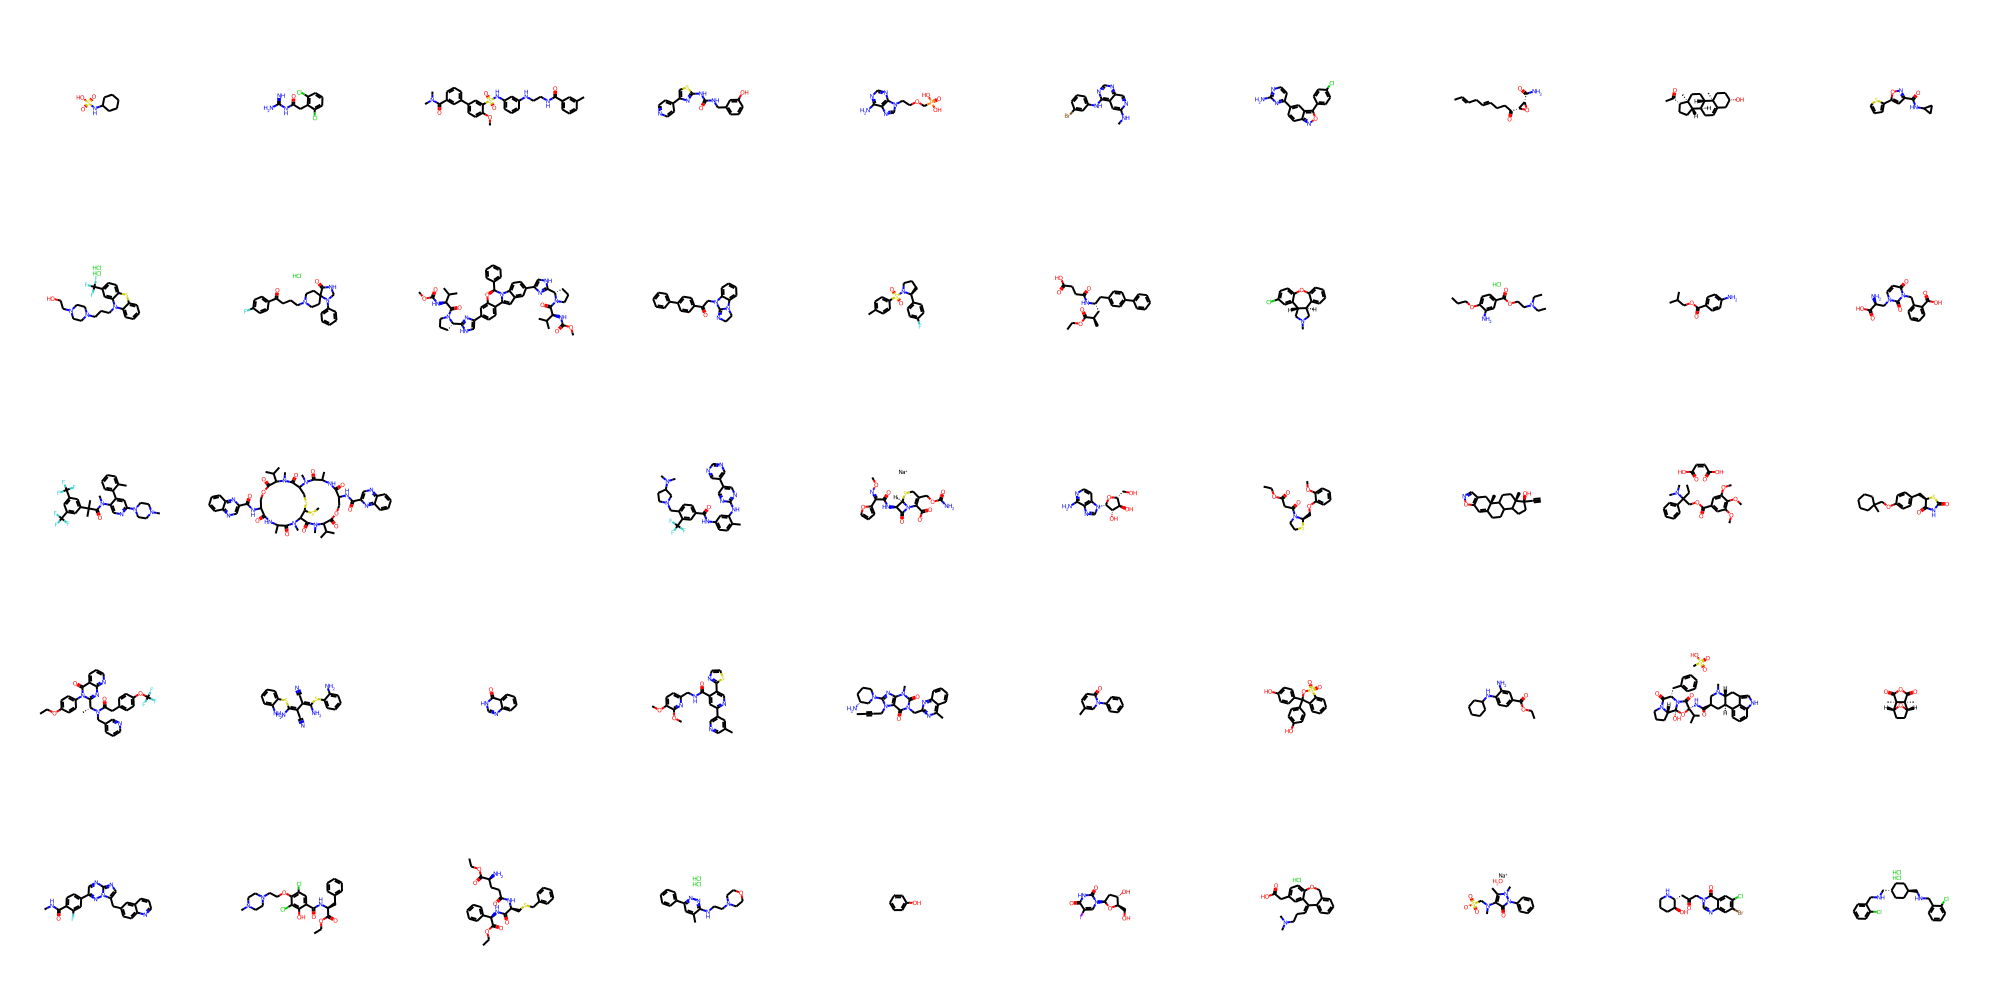

In [2720]:
smiles_list = [

'O=S(=O)(O)NC1CCCCC1',
'N=C(N)NC(=O)Cc1c(Cl)cccc1Cl',
'COc1ccc(-c2cccc(C(=O)N(C)C)c2)cc1S(=O)(=O)Nc1cccc(NCCNC(=O)c2cccc(C)c2)c1',
'O=C(NCc1cccc(O)c1)Nc1nc(-c2ccncc2)cs1',
'Nc1ncnc2c1ncn2CCOCP(=O)(O)O',
'CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1',
'Nc1nccc(-c2ccc3noc(-c4ccc(Cl)cc4)c3c2)n1',
'C/C=C/C/C=C/CCC(=O)[C@H]1O[C@H]1C(N)=O',
'CC(=O)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@]12C',
'O=C(NC1CC1)c1cc(-c2cccs2)on1',
'Cl.Cl.OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1',
'Cl.O=C(CCCN1CCC2(CC1)C(=O)NCN2c1ccccc1)c1ccc(F)cc1',
'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2)O[C@@H](c2ccccc2)n2c-3cc3cc(-c4c[nH]c([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)n4)ccc32)c[nH]1)C(C)C',
'O=C(CN1C2=NCCN2c2ccccc21)c1ccc(-c2ccccc2)cc1',
'Cc1ccc(S(=O)(=O)N2CCC[C@H]2c2ccc(F)cc2)cc1',
'CCOC(=O)[C@H](C)C[C@@H](Cc1ccc(-c2ccccc2)cc1)NC(=O)CCC(=O)O',
'CN1C[C@@H]2c3ccccc3Oc3ccc(Cl)cc3[C@H]2C1',
'CCCOc1ccc(C(=O)OCCN(CC)CC)cc1N.Cl',
'CC(C)COC(=O)c1ccc(N)cc1',
'N[C@@H](Cn1ccc(=O)n(Cc2ccccc2C(=O)O)c1=O)C(=O)O',
'Cc1ccccc1-c1cc(N2CCN(C)CC2)ncc1N(C)C(=O)C(C)(C)c1cc(C(F)(F)F)cc(C(F)(F)F)c1',
'CSC1SCC2C(=O)N(C)C(C(C)C)C(=O)OCC(NC(=O)c3cnc4ccccc4n3)C(=O)NC(C)C(=O)N(C)C1C(=O)N(C)C(C(C)C)C(=O)OCC(NC(=O)c1cnc3ccccc3n1)C(=O)NC(C)C(=O)N2C',
'No Data',
'Cc1ccc(NC(=O)c2ccc(CN3CCC(N(C)C)C3)c(C(F)(F)F)c2)cc1Nc1ncc(-c2cncnc2)cn1',
'CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(COC(N)=O)CS[C@H]12)c1ccco1.[Na+]',
'Nc1nccc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@@H]1O',
'CCOC(=O)CC(=O)N1CCS[C@@H]1COc1ccccc1OC',
'C#C[C@]1(O)CCC2C3CCC4=Cc5oncc5C[C@]4(C)C3CC[C@@]21C',
'CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C.O=C(O)/C=C\C(=O)O',
'CC1(COc2ccc(C[C@H]3SC(=O)NC3=O)cc2)CCCCC1',
'CCOc1ccc(-n2c([C@@H](C)N(Cc3cccnc3)C(=O)Cc3ccc(OC(F)(F)F)cc3)nc3ncccc3c2=O)cc1',
'N#CC(=C(/N)Sc1ccccc1N)/C(C#N)=C(/N)Sc1ccccc1N',
'O=c1[nH]cnc2ccccc12',
'COc1ccc(CNC(=O)c2cc(-c3cncc(C)c3)ncc2-c2nccs2)nc1OC',
'CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc(C)c3ccccc3n1)c(=O)n2C',
'Cc1ccc(=O)n(-c2ccccc2)c1',
'O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21',
'CCOC(=O)c1ccc(NC2CCCCC2)c(N)c1',
'CC(C)[C@@]1(NC(=O)[C@@H]2C[C@@H]3c4cccc5[nH]cc(c45)C[C@H]3N(C)C2)O[C@@]2(O)[C@@H]3CCCN3C(=O)[C@H](Cc3ccccc3)N2C1=O.CS(=O)(=O)O',
'C[C@]12C(=O)OC(=O)[C@@]1(C)[C@@H]1CC[C@H]2O1',
'CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F',
'CCOC(=O)[C@H](Cc1ccccc1)NC(=O)c1cc(Cl)c(OCCN2CCN(C)CC2)c(Cl)c1O',
'CCOC(=O)[C@@H](N)CCC(=O)N[C@@H](CSCc1ccccc1)C(=O)N[C@@H](C(=O)OCC)c1ccccc1',
'Cc1cc(-c2ccccc2)nnc1NCCN1CCOCC1.Cl.Cl',
'Oc1ccccc1',
'O=c1[nH]c(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1I',
'CN(C)CC/C=C1/c2ccccc2COc2ccc(CC(=O)O)cc21.Cl',
' Cc1c(N(C)CS(=O)(=O)[O-])c(=O)n(-c2ccccc2)n1C.O.[Na+]',
'O=C(C[C@H]1NCCC[C@@H]1O)Cn1cnc2cc(Br)c(Cl)cc2c1=O',
'Cl.Cl.Clc1ccccc1CNC[C@H]1CC[C@H](CNCc2ccccc2Cl)CC1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



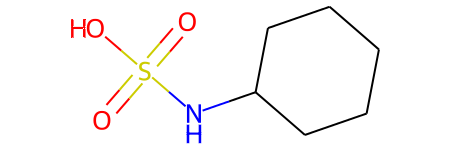

In [2721]:
M1 = mol_list [0]
M1

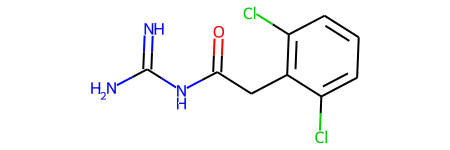

In [2722]:
M2 = mol_list [1]
M2

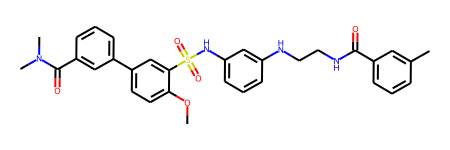

In [2723]:
M3 = mol_list [2]
M3

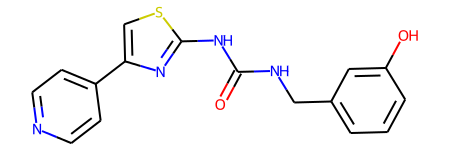

In [2724]:
M4 = mol_list [3]
M4

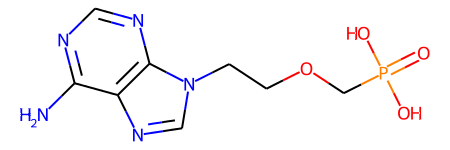

In [2725]:
M5 = mol_list [4]
M5

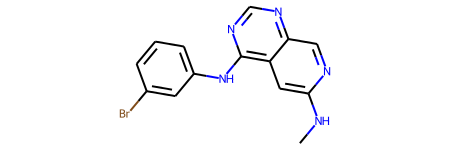

In [2726]:
M6 = mol_list [5]
M6

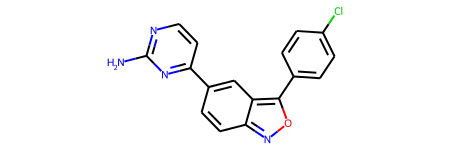

In [2727]:
M7 = mol_list [6]
M7

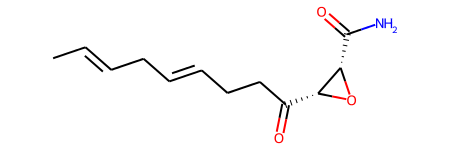

In [2728]:
M8 = mol_list [7]
M8

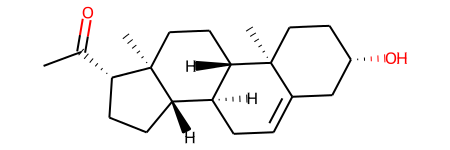

In [2729]:
M9 = mol_list [8]
M9

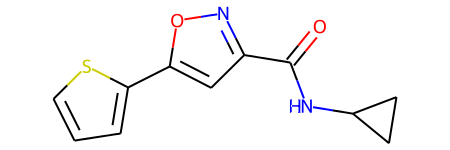

In [2730]:
M10 = mol_list [9]
M10

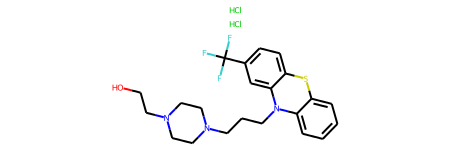

In [2731]:
M11 = mol_list [10]
M11

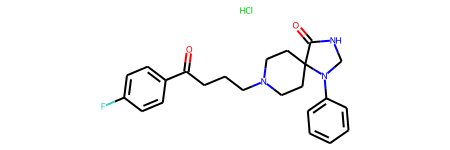

In [2732]:
M12 = mol_list [11]
M12

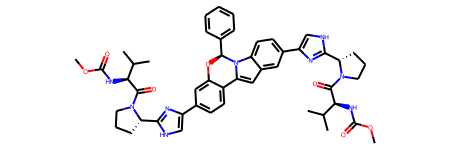

In [2733]:
M13 = mol_list [12]
M13

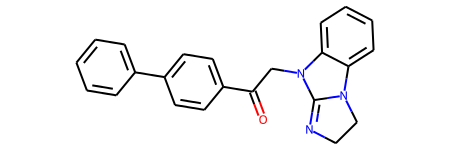

In [2734]:
M14 = mol_list [13]
M14

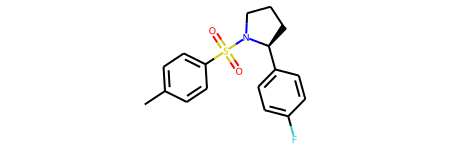

In [2735]:
M15 = mol_list [14]
M15

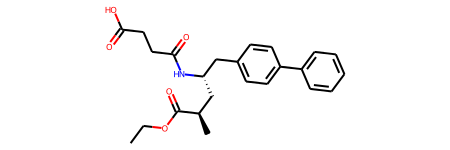

In [2736]:
M16 = mol_list [15]
M16

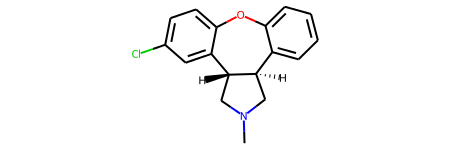

In [2737]:
M17 = mol_list [16]
M17

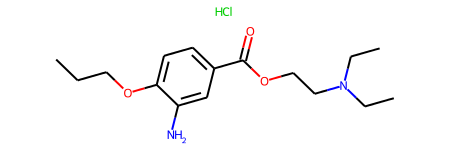

In [2738]:
M18 = mol_list [17]
M18

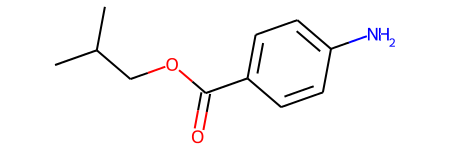

In [2739]:
M19 = mol_list [18]
M19

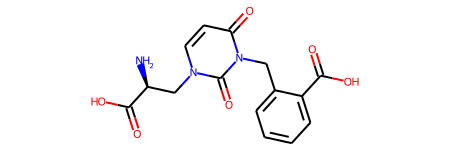

In [2740]:
M20 = mol_list [19]
M20

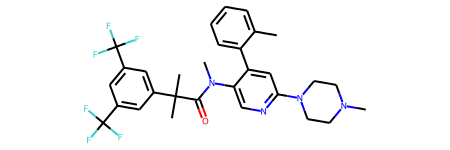

In [2741]:
M21 = mol_list [20]
M21

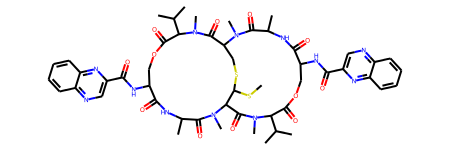

In [2742]:
M22 = mol_list [21]
M22

In [2743]:
M23 = mol_list [22]
M23

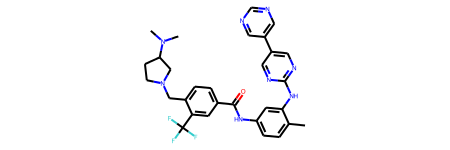

In [2744]:
M24 = mol_list [23]
M24

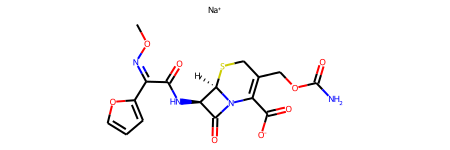

In [2745]:
M25 = mol_list [24]
M25

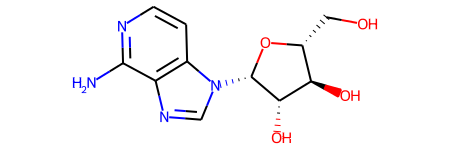

In [2746]:
M26 = mol_list [25]
M26

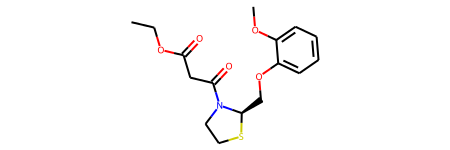

In [2747]:
M27 = mol_list [26]
M27

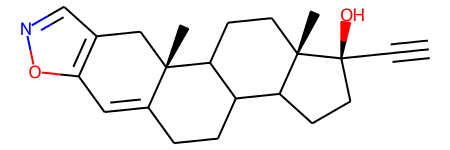

In [2748]:
M28 = mol_list [27]
M28

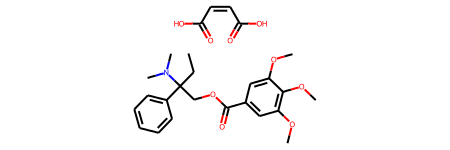

In [2749]:
M29 = mol_list [28]
M29

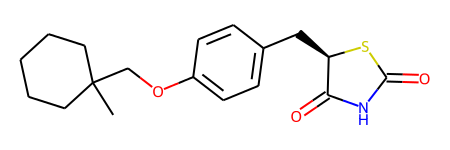

In [2750]:
M30 = mol_list [29]
M30

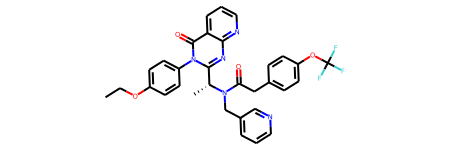

In [2751]:
M31 = mol_list [30]
M31

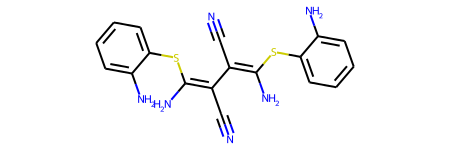

In [2752]:
M32 = mol_list [31]
M32

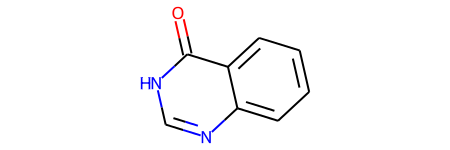

In [2753]:
M33 = mol_list [32]
M33

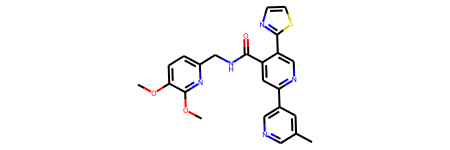

In [2754]:
M34 = mol_list [33]
M34

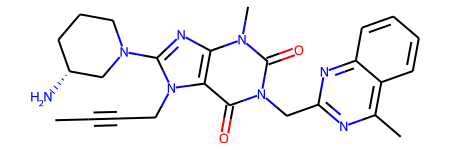

In [2755]:
M35 = mol_list [34]
M35

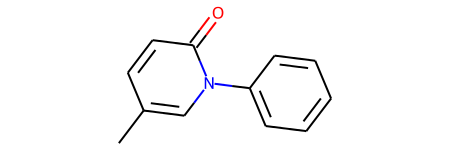

In [2756]:
M36 = mol_list [35]
M36

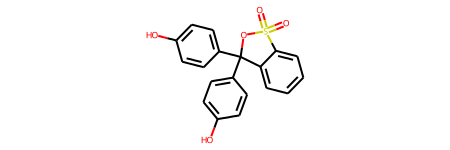

In [2757]:
M37= mol_list [36]
M37

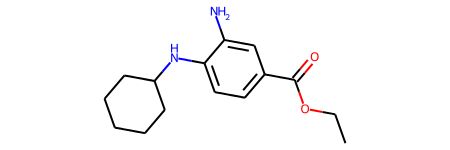

In [2758]:
M38= mol_list [37]
M38

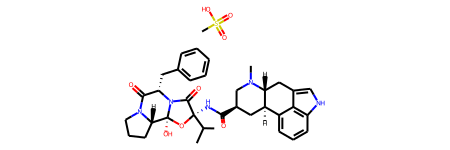

In [2759]:
M39= mol_list [38]
M39

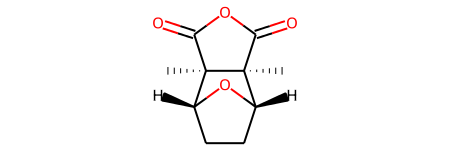

In [2760]:
M40= mol_list [39]
M40

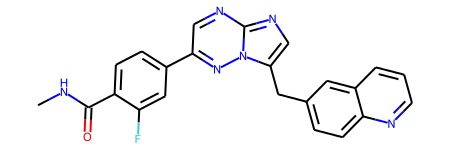

In [2761]:
M41= mol_list [40]
M41

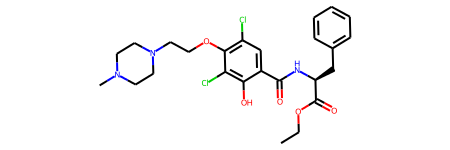

In [2762]:
M42= mol_list [41]
M42

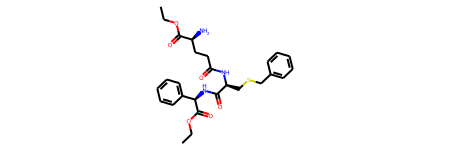

In [2763]:
M43= mol_list [42]
M43

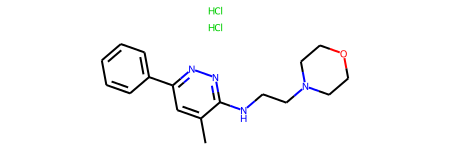

In [2764]:
M44= mol_list [43]
M44

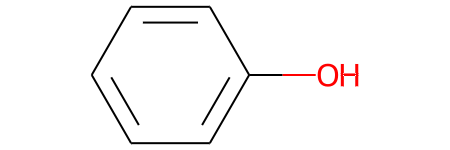

In [2765]:
M45= mol_list [44]
M45

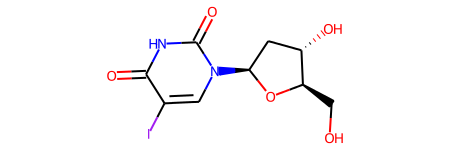

In [2766]:
M46= mol_list [45]
M46

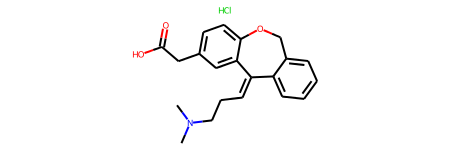

In [2767]:
M47= mol_list [46]
M47

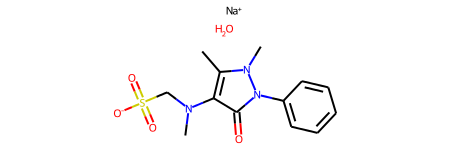

In [2768]:
M48= mol_list [47]
M48

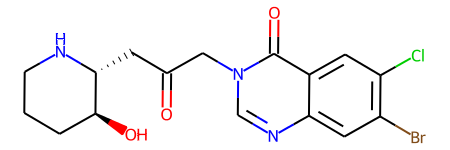

In [2769]:
M49= mol_list [48]
M49

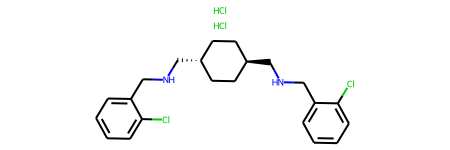

In [2770]:
M50= mol_list [49]
M50

In [2771]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[2,
 4,
 92,
 128,
 301,
 350,
 428,
 437,
 452,
 455,
 592,
 606,
 610,
 650,
 807,
 890,
 911,
 926,
 1019]

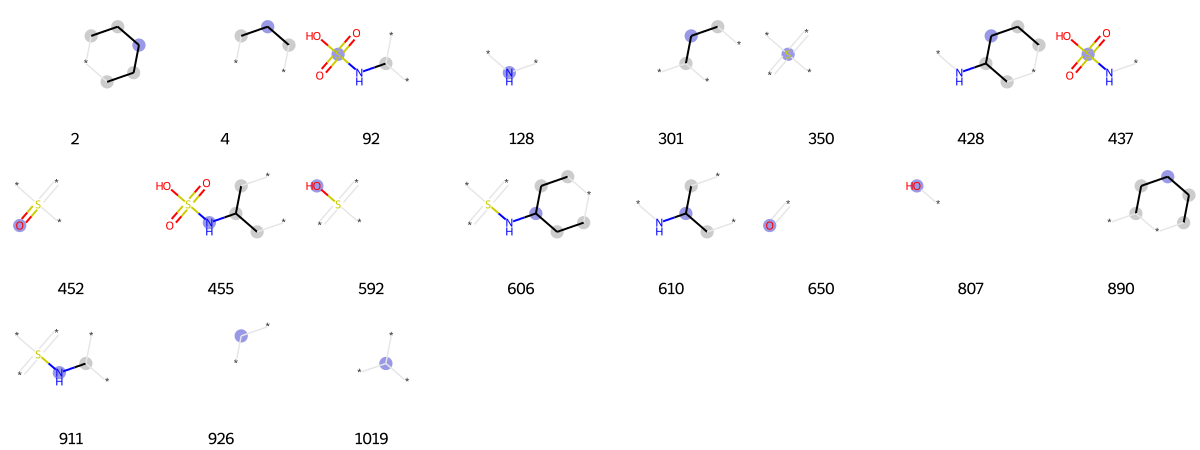

In [2772]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2773]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[15,
 41,
 64,
 80,
 95,
 128,
 140,
 147,
 167,
 246,
 325,
 356,
 366,
 427,
 434,
 561,
 623,
 650,
 659,
 684,
 726,
 807,
 849,
 893,
 960,
 974,
 996,
 1010]

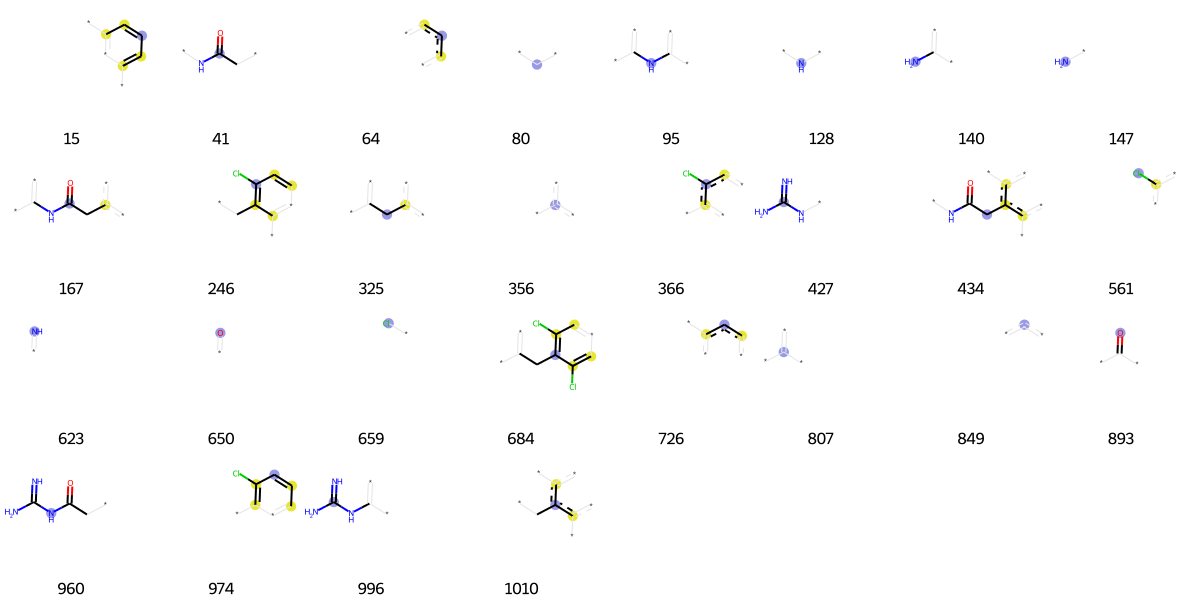

In [2774]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2775]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[8,
 15,
 31,
 33,
 37,
 64,
 80,
 94,
 128,
 136,
 139,
 181,
 191,
 197,
 232,
 246,
 249,
 265,
 350,
 356,
 361,
 392,
 452,
 486,
 493,
 502,
 503,
 512,
 526,
 558,
 608,
 629,
 650,
 667,
 695,
 698,
 703,
 726,
 736,
 743,
 744,
 775,
 785,
 789,
 799,
 806,
 807,
 837,
 841,
 849,
 875,
 881,
 893,
 896,
 904,
 929,
 946,
 960,
 961,
 1013]

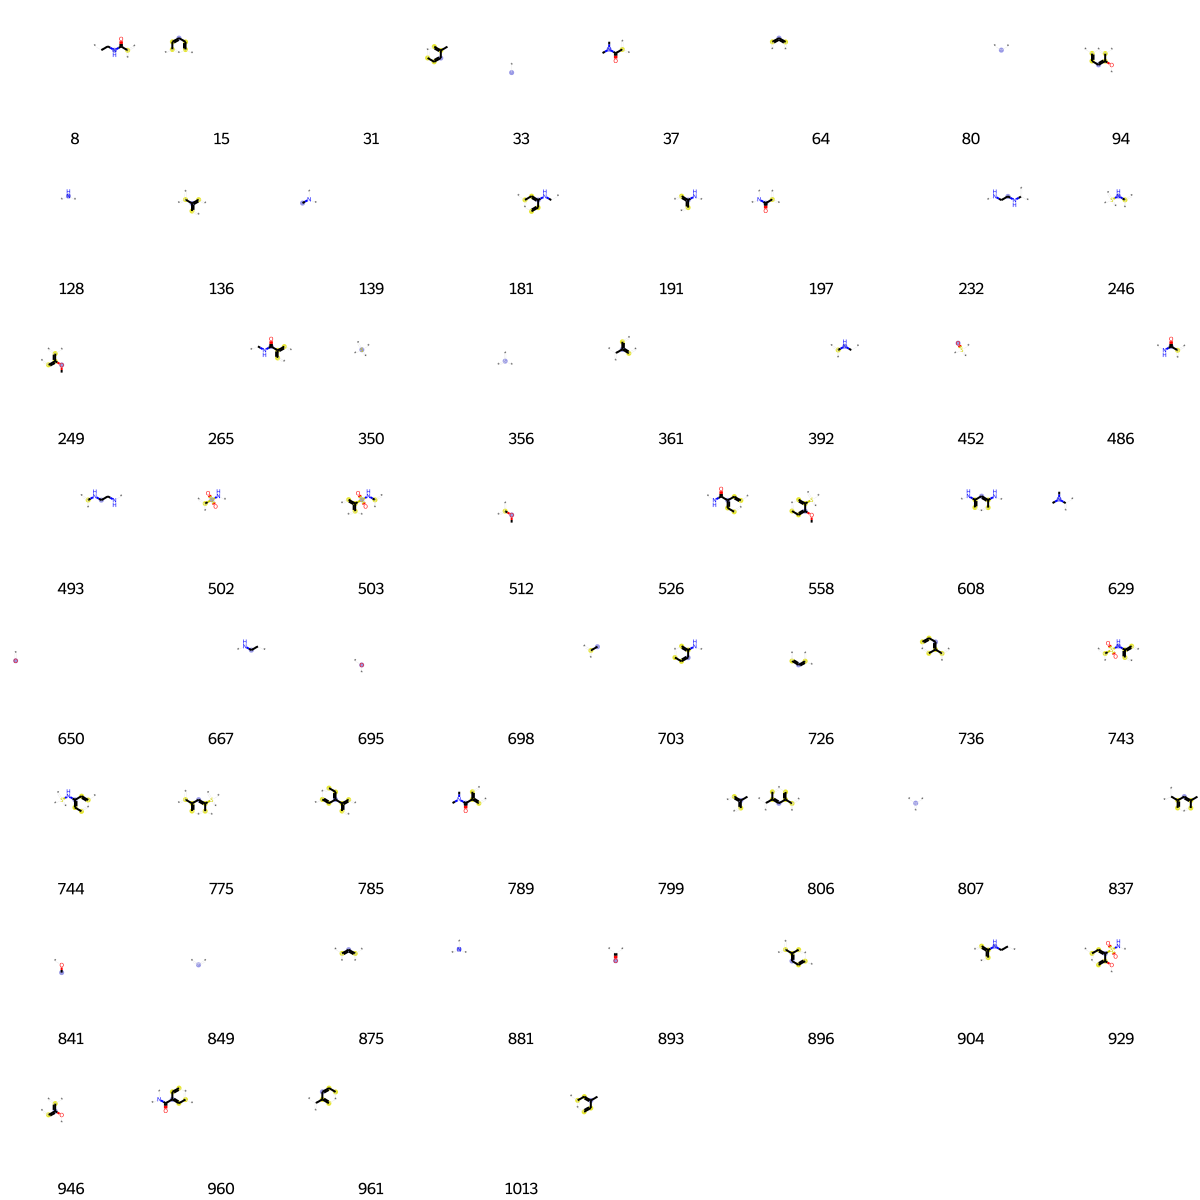

In [2776]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [2777]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[15,
 36,
 42,
 64,
 65,
 80,
 117,
 128,
 136,
 184,
 190,
 197,
 240,
 242,
 255,
 312,
 356,
 376,
 378,
 381,
 383,
 385,
 543,
 549,
 552,
 578,
 579,
 650,
 675,
 702,
 726,
 730,
 745,
 755,
 792,
 807,
 831,
 842,
 849,
 875,
 893,
 912,
 947,
 965,
 980]

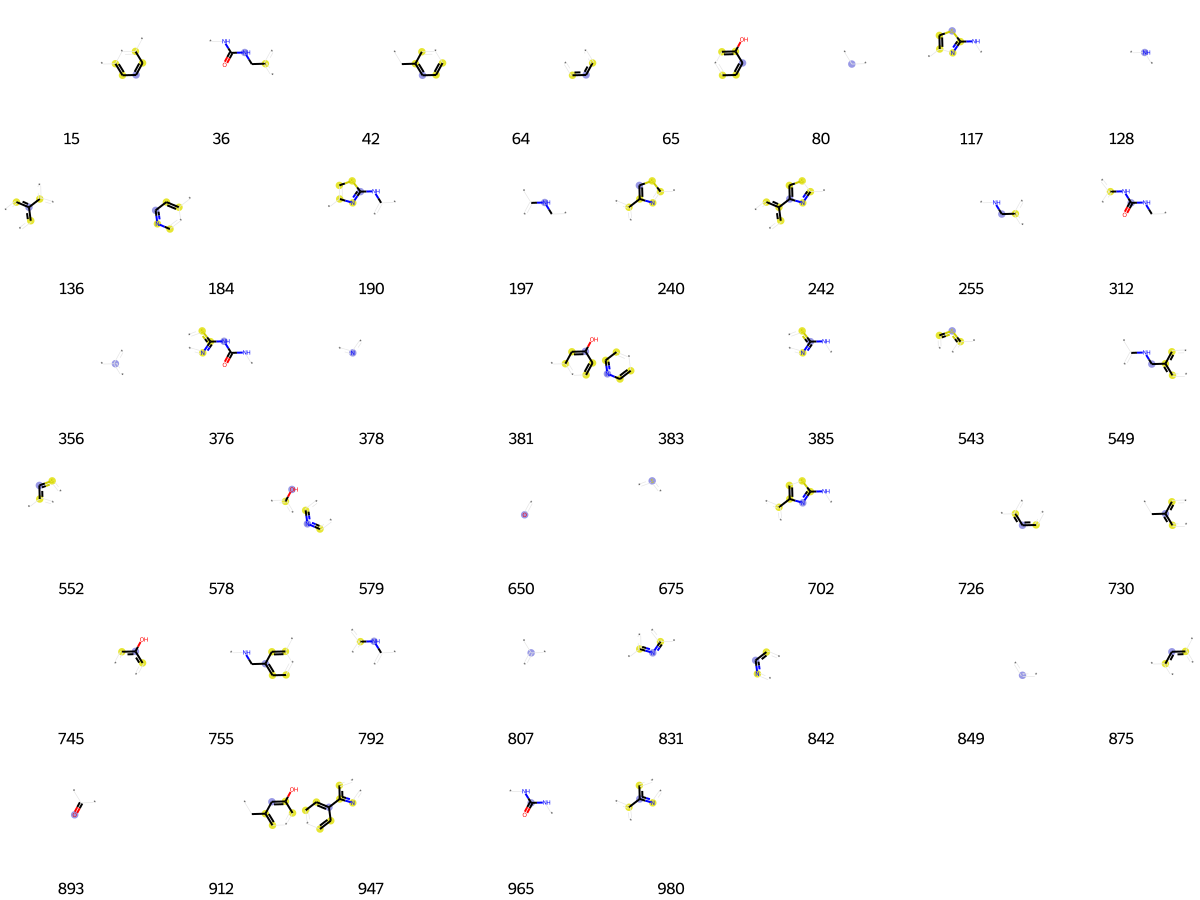

In [2778]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2779]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[9,
 13,
 71,
 80,
 121,
 147,
 192,
 209,
 351,
 356,
 378,
 401,
 428,
 431,
 433,
 435,
 445,
 481,
 486,
 489,
 548,
 605,
 650,
 653,
 672,
 695,
 700,
 703,
 786,
 790,
 807,
 814,
 830,
 849,
 884,
 932,
 935,
 962,
 968]

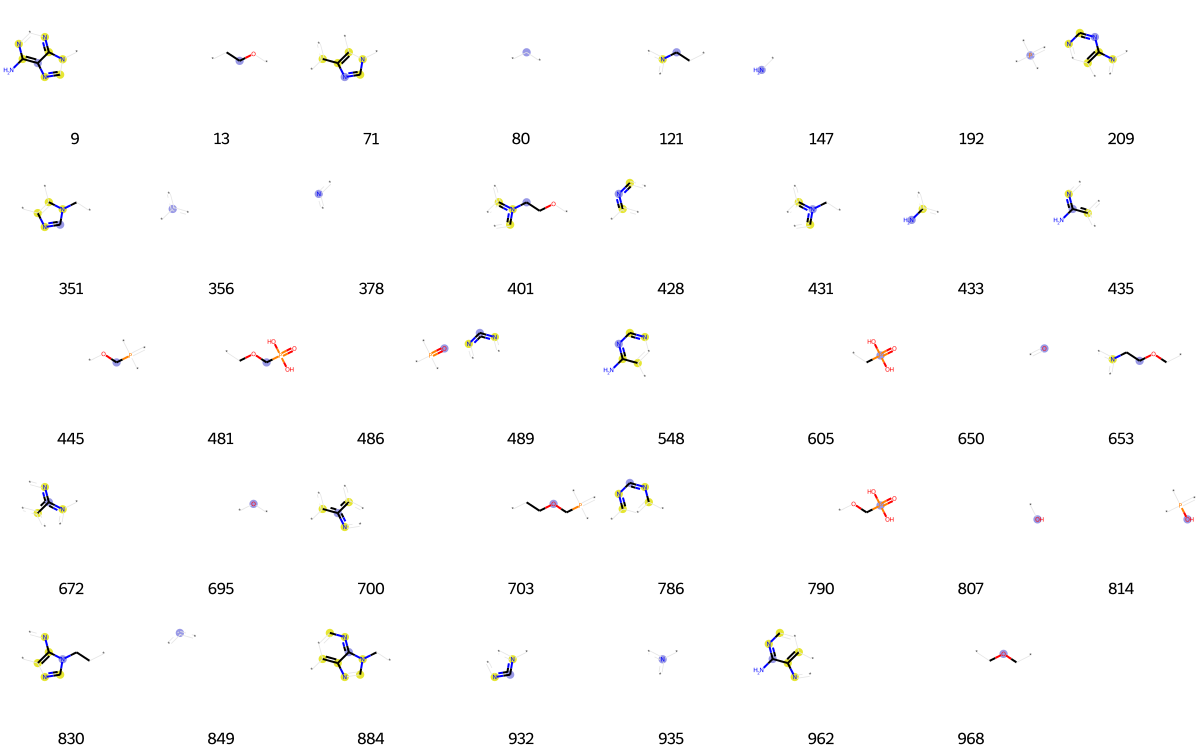

In [2780]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2781]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[8,
 15,
 33,
 36,
 64,
 73,
 75,
 115,
 128,
 133,
 191,
 202,
 270,
 329,
 333,
 343,
 356,
 378,
 406,
 428,
 474,
 485,
 489,
 491,
 511,
 524,
 607,
 636,
 703,
 708,
 726,
 728,
 766,
 786,
 794,
 849,
 875,
 888,
 909,
 927]

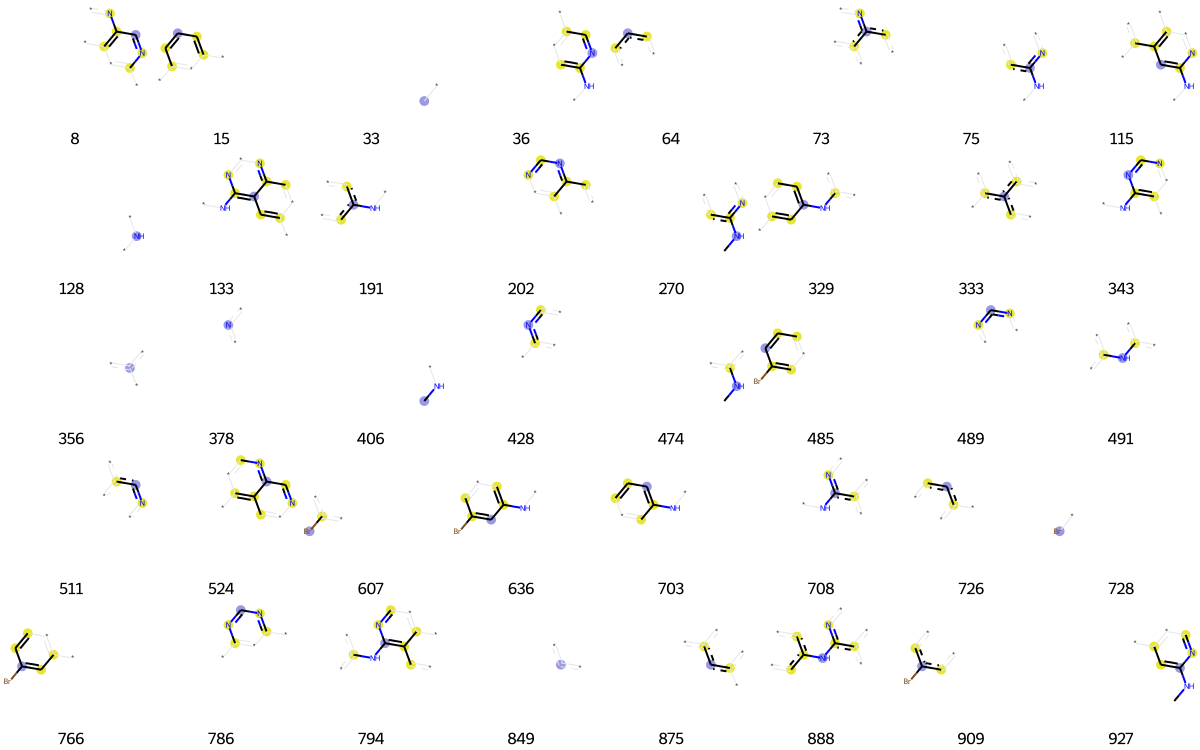

In [2782]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2783]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[36,
 46,
 61,
 73,
 136,
 147,
 177,
 216,
 234,
 248,
 333,
 356,
 378,
 404,
 409,
 428,
 433,
 518,
 550,
 561,
 646,
 656,
 659,
 714,
 726,
 787,
 806,
 816,
 831,
 842,
 844,
 849,
 875,
 896,
 913,
 961,
 980,
 1004,
 1008,
 1012]

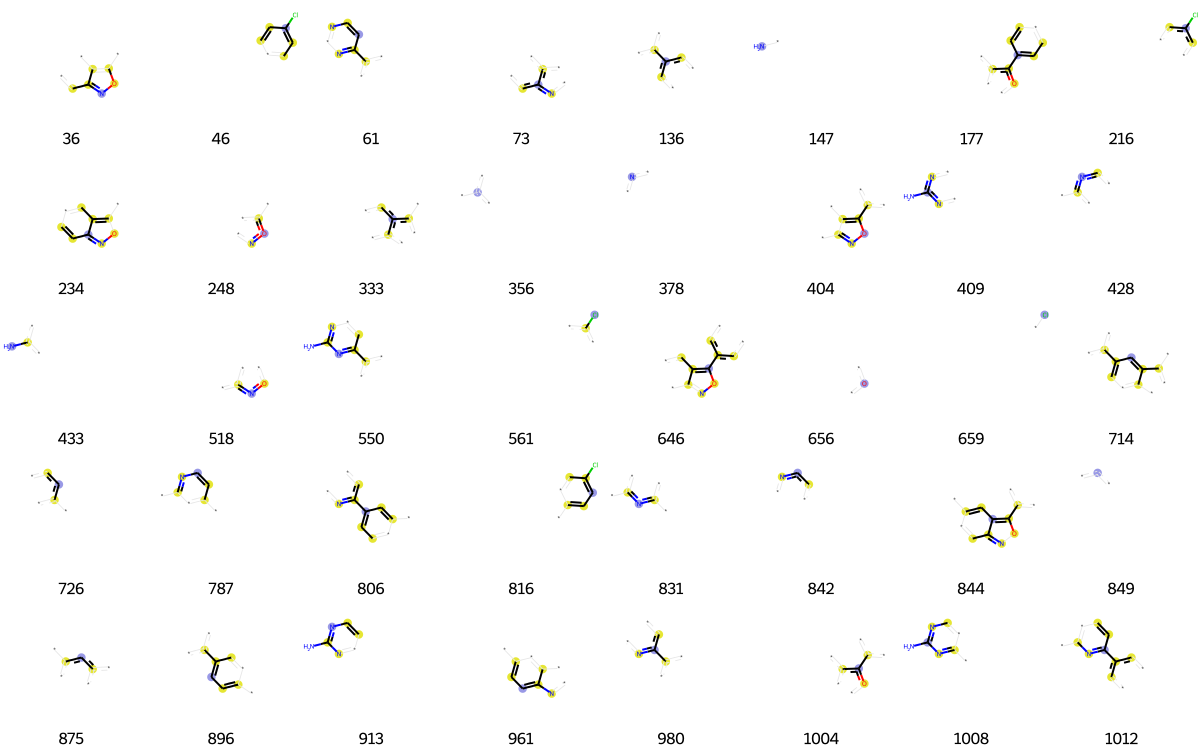

In [2784]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2785]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[33,
 41,
 47,
 80,
 101,
 140,
 147,
 171,
 208,
 210,
 332,
 401,
 494,
 521,
 540,
 600,
 604,
 646,
 650,
 656,
 694,
 731,
 774,
 807,
 844,
 849,
 893,
 894,
 897,
 960,
 1019]

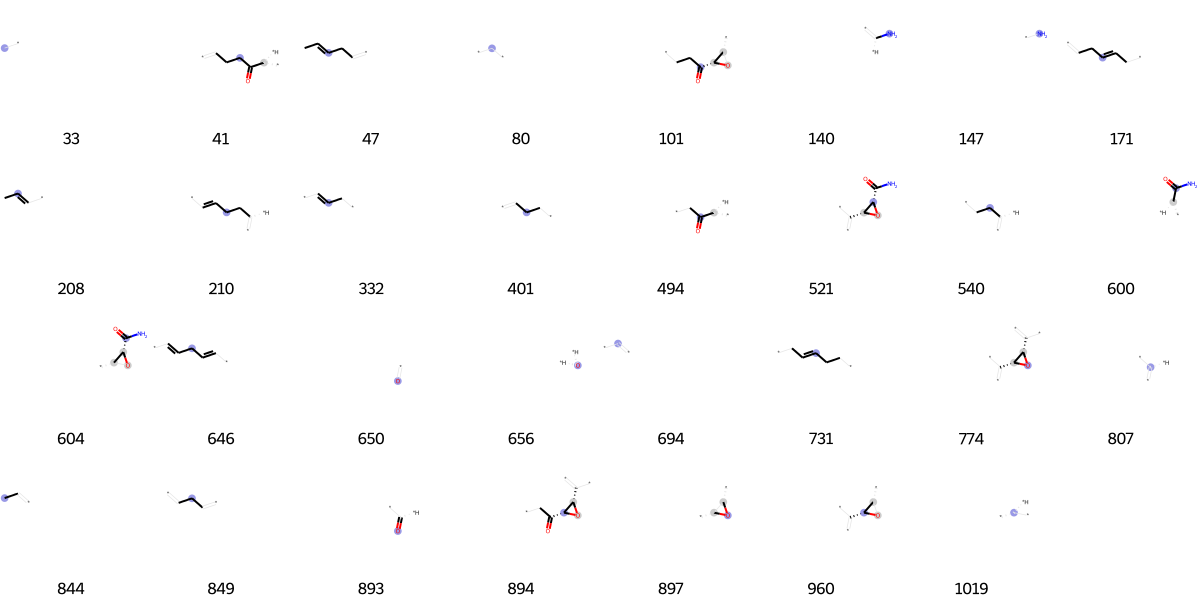

In [2786]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [2787]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[7,
 16,
 33,
 36,
 105,
 106,
 120,
 138,
 157,
 206,
 231,
 233,
 250,
 279,
 301,
 302,
 331,
 356,
 377,
 439,
 453,
 504,
 519,
 529,
 562,
 590,
 598,
 622,
 650,
 694,
 696,
 757,
 775,
 807,
 849,
 850,
 860,
 893,
 926,
 927,
 1017,
 1019]

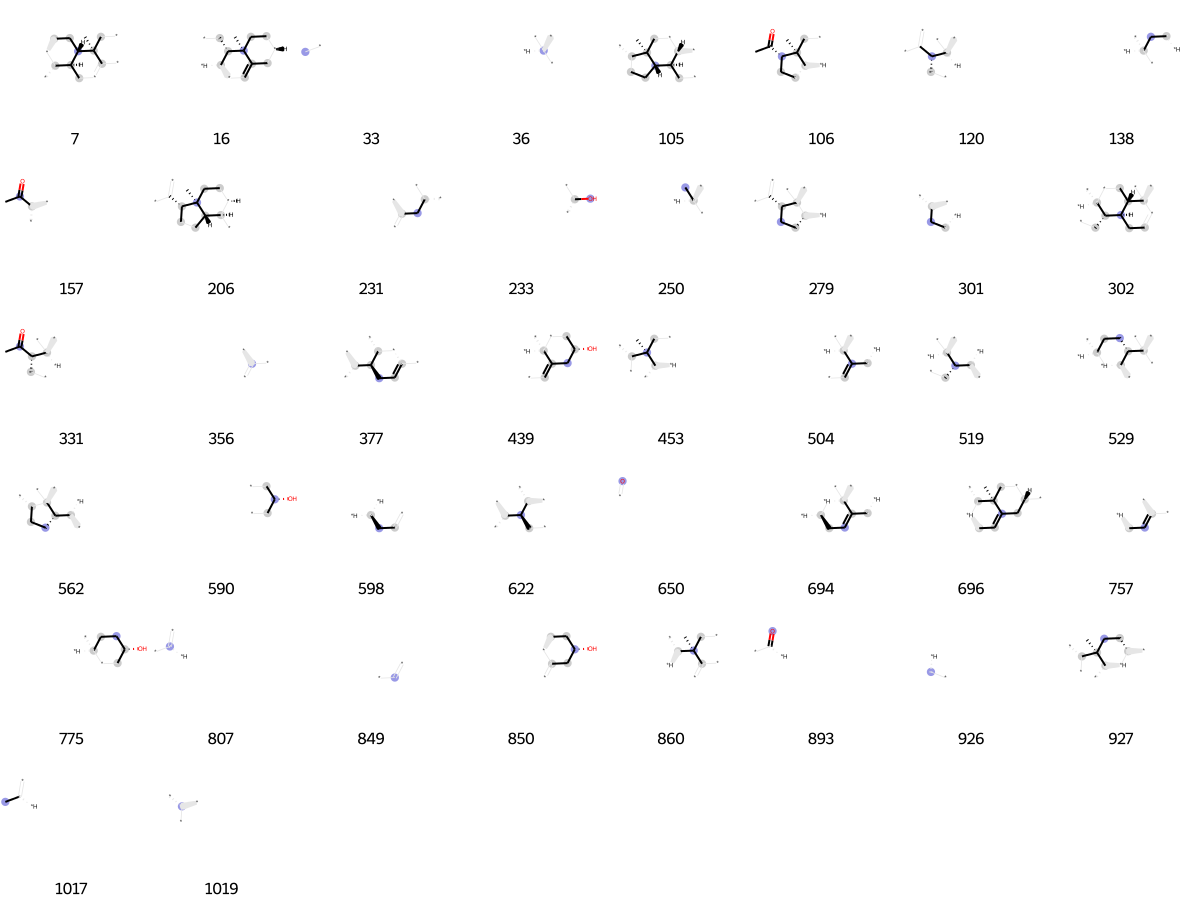

In [2788]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2789]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[9,
 14,
 62,
 64,
 121,
 128,
 241,
 248,
 301,
 318,
 339,
 356,
 378,
 383,
 387,
 420,
 486,
 515,
 518,
 543,
 554,
 610,
 631,
 650,
 656,
 667,
 675,
 726,
 729,
 807,
 849,
 855,
 875,
 893,
 926,
 1019]

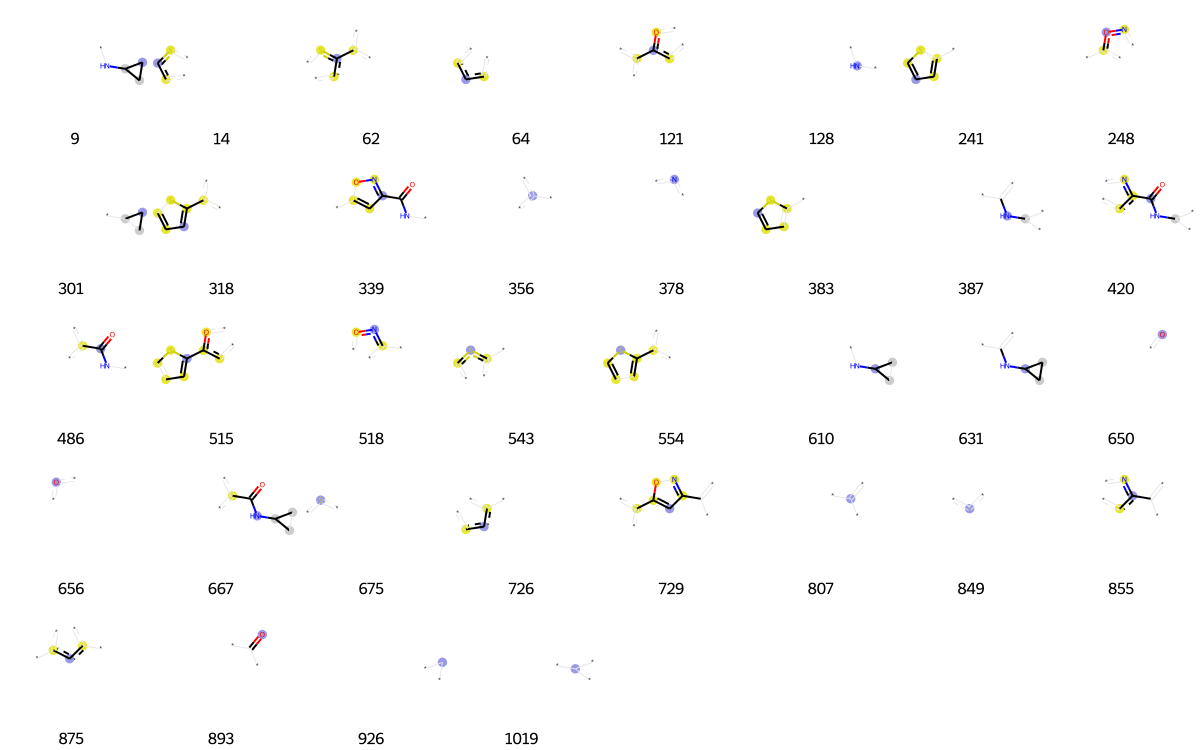

In [2790]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2791]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[4,
 64,
 74,
 77,
 80,
 114,
 121,
 143,
 175,
 193,
 205,
 222,
 226,
 236,
 271,
 356,
 393,
 397,
 429,
 446,
 456,
 458,
 473,
 498,
 514,
 561,
 588,
 623,
 641,
 653,
 675,
 726,
 744,
 767,
 804,
 807,
 809,
 849,
 875,
 887,
 904,
 917,
 926,
 935,
 949,
 1020]

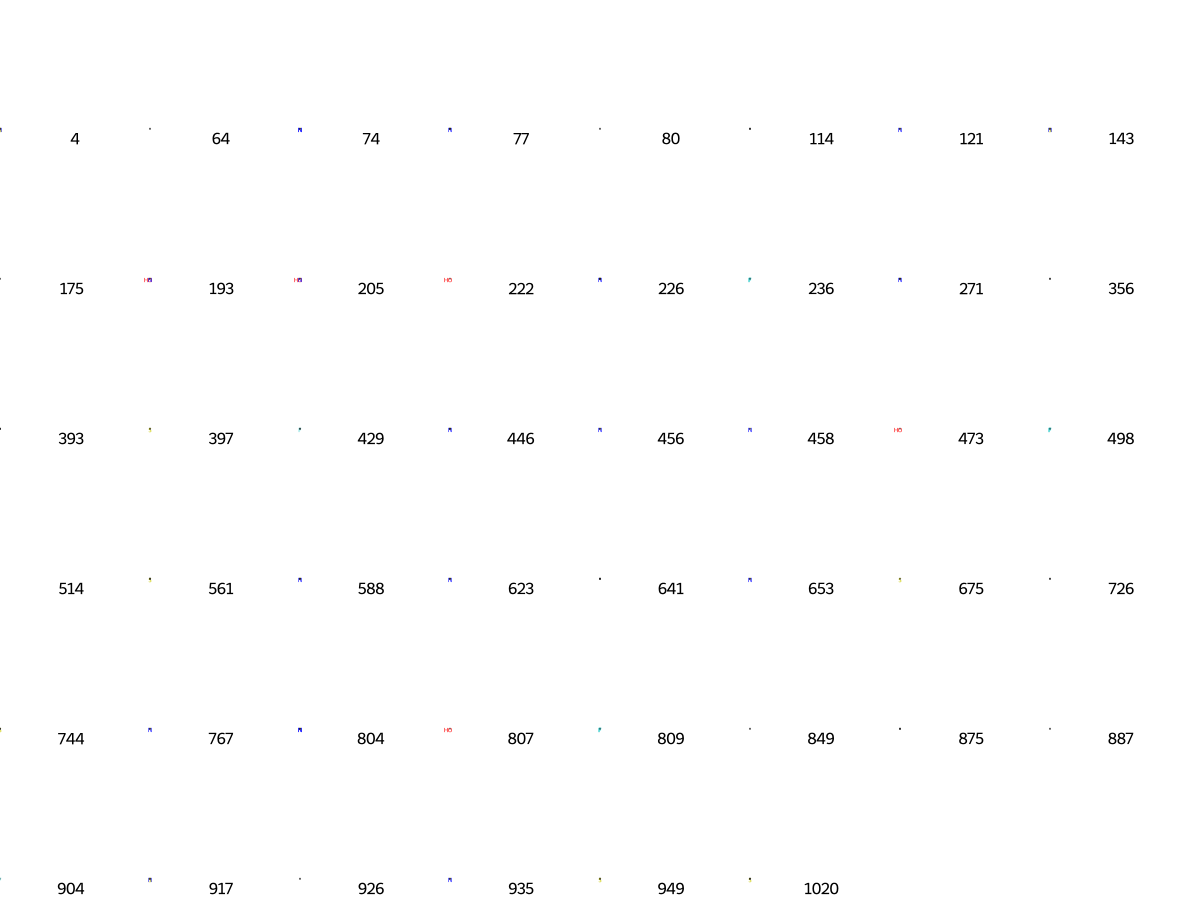

In [2792]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2793]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[25,
 34,
 36,
 64,
 80,
 90,
 121,
 138,
 175,
 256,
 284,
 314,
 351,
 356,
 361,
 386,
 389,
 417,
 427,
 456,
 458,
 462,
 513,
 514,
 540,
 594,
 646,
 650,
 652,
 653,
 669,
 673,
 690,
 699,
 711,
 713,
 726,
 767,
 801,
 807,
 814,
 842,
 849,
 887,
 893,
 904,
 926,
 935,
 1021]

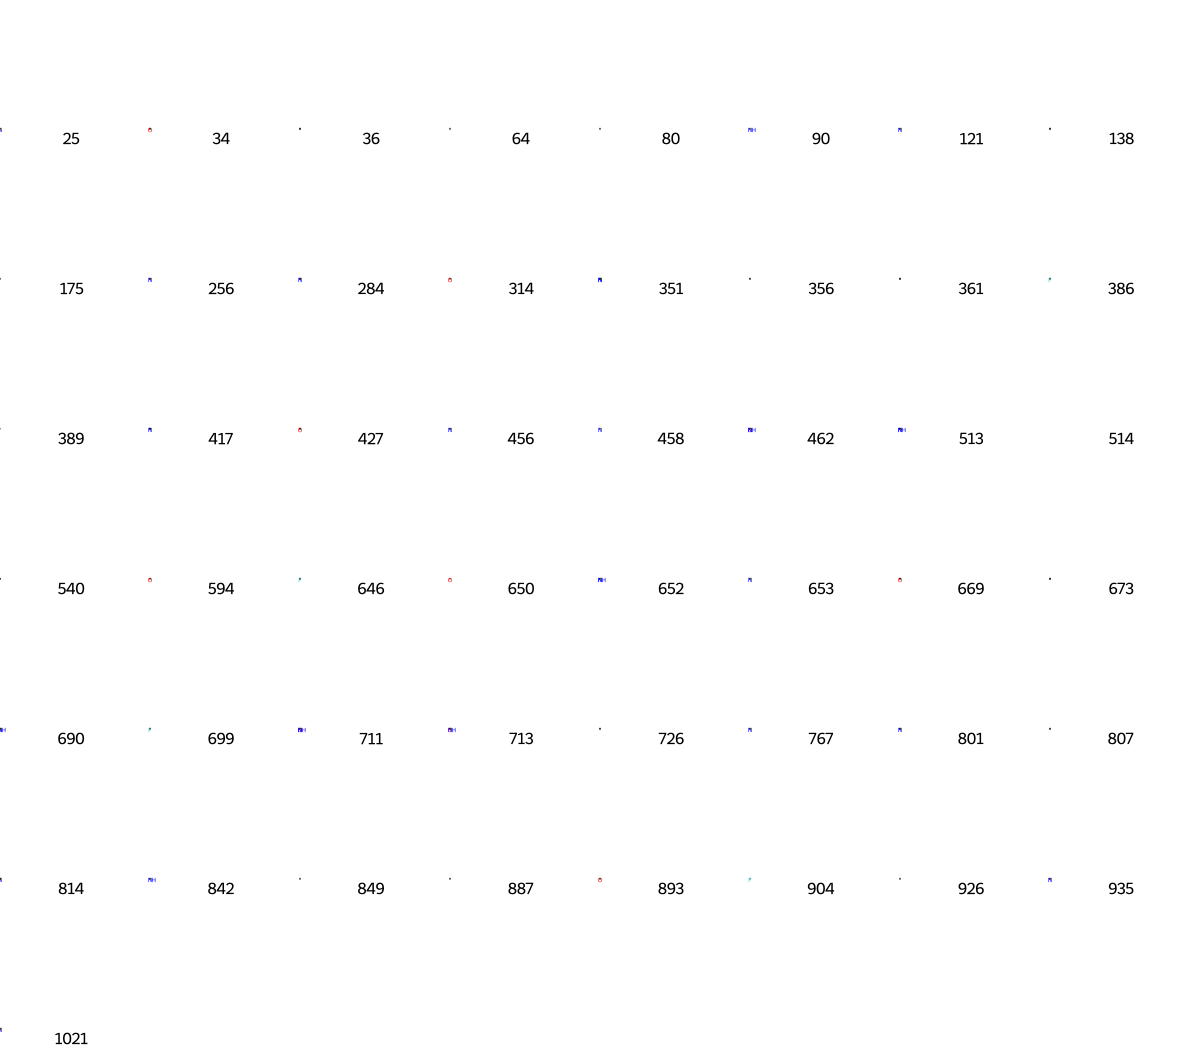

In [2794]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2795]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 4,
 14,
 16,
 33,
 45,
 64,
 72,
 79,
 90,
 94,
 108,
 117,
 128,
 136,
 160,
 175,
 187,
 188,
 193,
 204,
 231,
 241,
 242,
 244,
 255,
 260,
 275,
 283,
 288,
 301,
 336,
 337,
 339,
 343,
 352,
 356,
 359,
 378,
 389,
 446,
 456,
 502,
 507,
 510,
 571,
 632,
 639,
 650,
 653,
 656,
 668,
 680,
 695,
 717,
 726,
 734,
 749,
 750,
 806,
 807,
 831,
 841,
 849,
 855,
 875,
 881,
 884,
 893,
 896,
 926,
 931,
 935,
 980,
 997,
 1019]

In [2796]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[64,
 80,
 116,
 126,
 136,
 175,
 212,
 271,
 288,
 313,
 332,
 352,
 356,
 361,
 378,
 389,
 433,
 456,
 513,
 560,
 588,
 594,
 623,
 650,
 669,
 673,
 726,
 736,
 805,
 807,
 847,
 849,
 881,
 893,
 896,
 926,
 935,
 940,
 942,
 983]

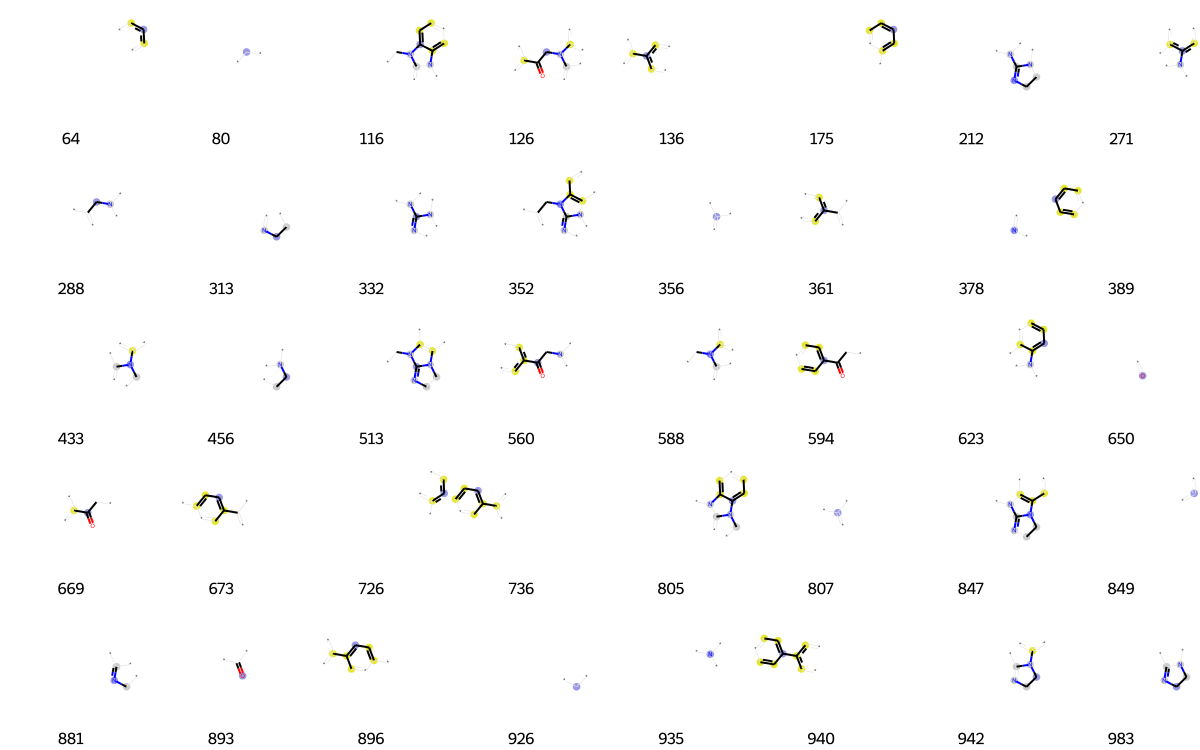

In [2797]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2798]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[4,
 33,
 90,
 231,
 235,
 255,
 281,
 288,
 301,
 319,
 350,
 353,
 354,
 356,
 374,
 386,
 393,
 446,
 448,
 452,
 456,
 646,
 650,
 688,
 698,
 699,
 715,
 726,
 779,
 799,
 800,
 849,
 896,
 904,
 926,
 935,
 1019]

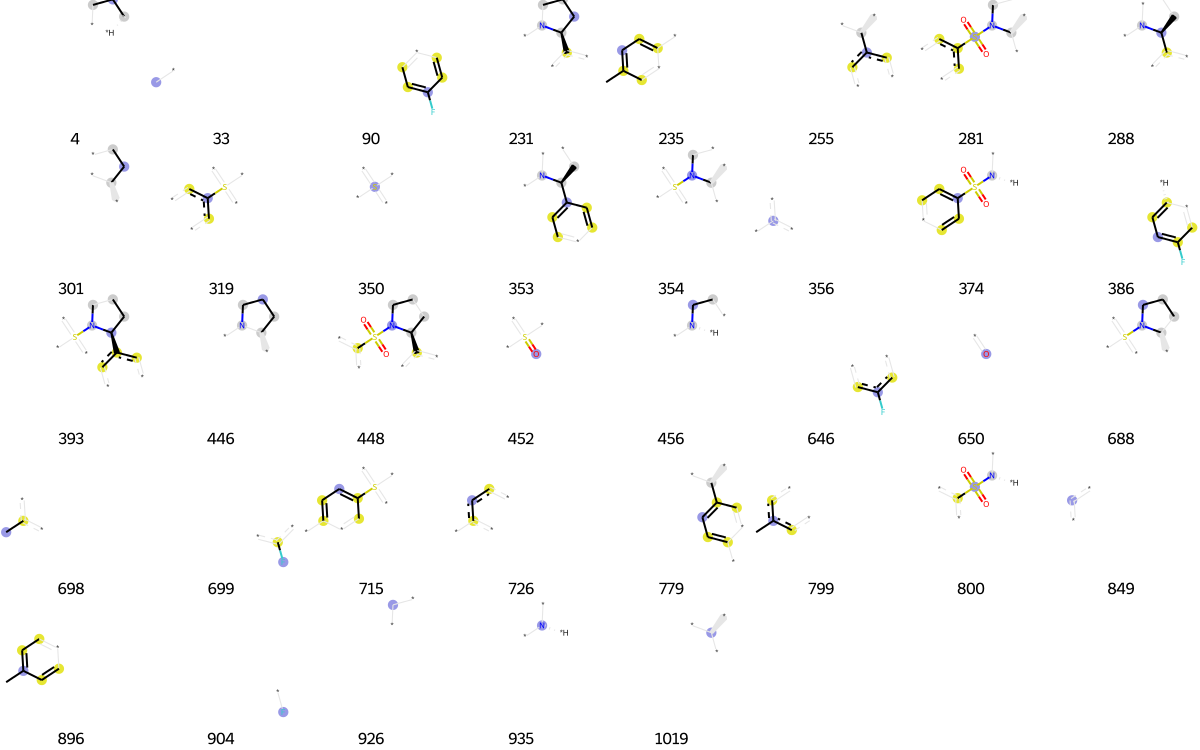

In [2799]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2800]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 10,
 33,
 41,
 64,
 79,
 80,
 117,
 128,
 136,
 147,
 175,
 214,
 216,
 232,
 263,
 283,
 294,
 310,
 353,
 356,
 389,
 459,
 540,
 551,
 650,
 680,
 695,
 698,
 713,
 726,
 730,
 736,
 794,
 807,
 840,
 849,
 857,
 868,
 893,
 895,
 896,
 911,
 940]

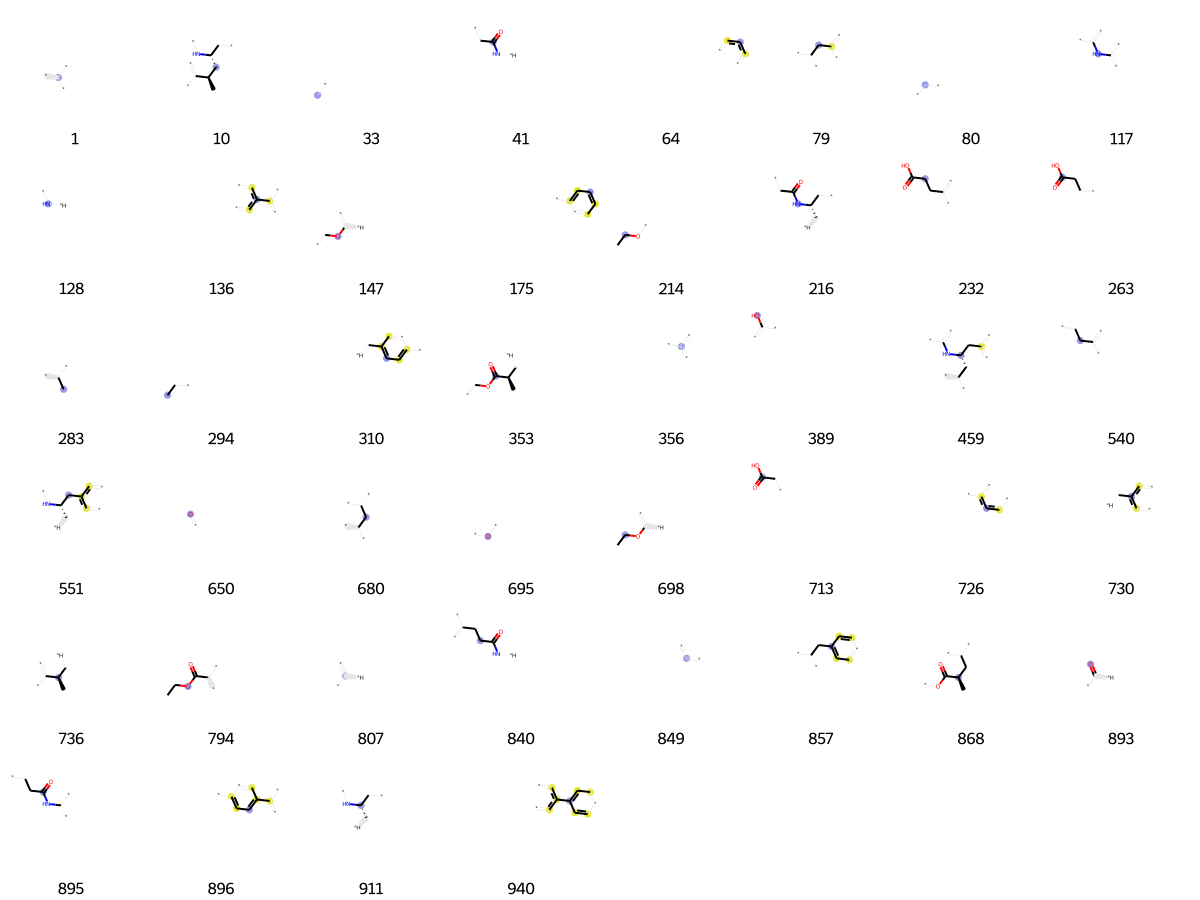

In [2801]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [2802]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[2,
 3,
 11,
 33,
 64,
 121,
 165,
 175,
 207,
 216,
 237,
 290,
 300,
 356,
 371,
 455,
 457,
 561,
 656,
 659,
 664,
 677,
 726,
 739,
 759,
 775,
 786,
 816,
 849,
 875,
 881,
 926,
 935,
 1019]

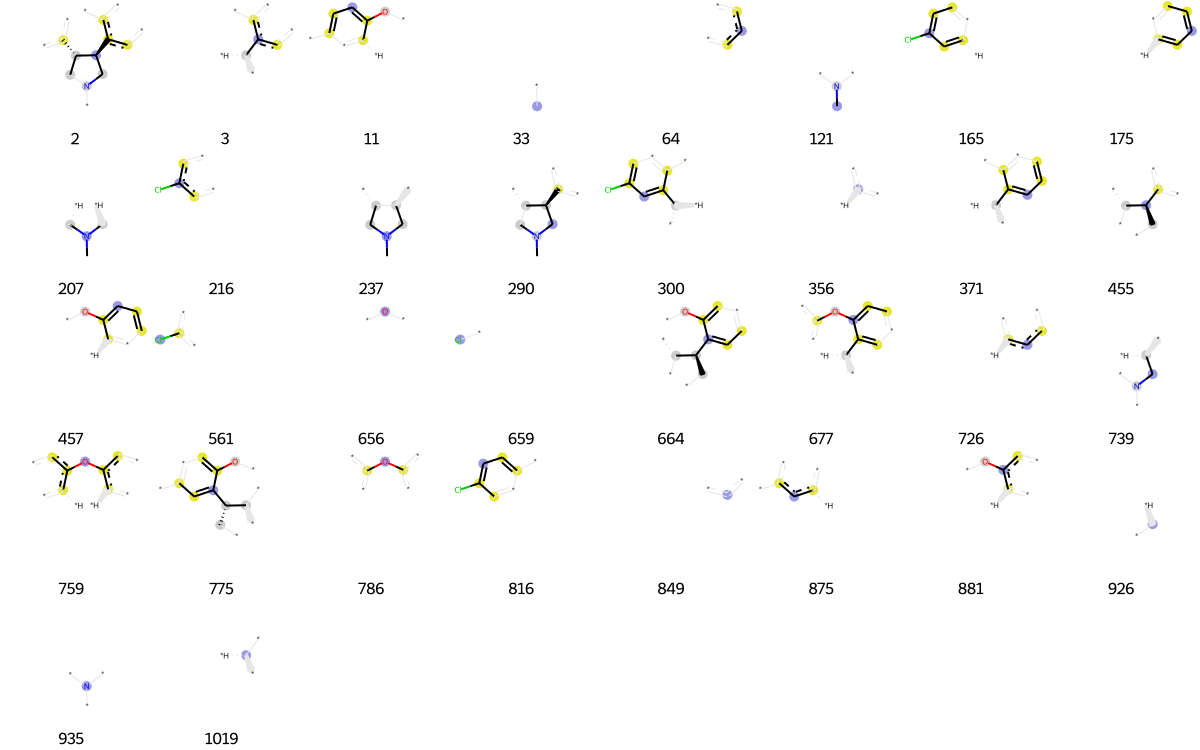

In [2803]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2804]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[13,
 33,
 76,
 80,
 94,
 145,
 147,
 172,
 251,
 294,
 319,
 356,
 361,
 428,
 433,
 469,
 494,
 498,
 514,
 568,
 620,
 644,
 650,
 673,
 695,
 726,
 732,
 794,
 807,
 820,
 849,
 870,
 875,
 881,
 893,
 910,
 927,
 932,
 946,
 957]

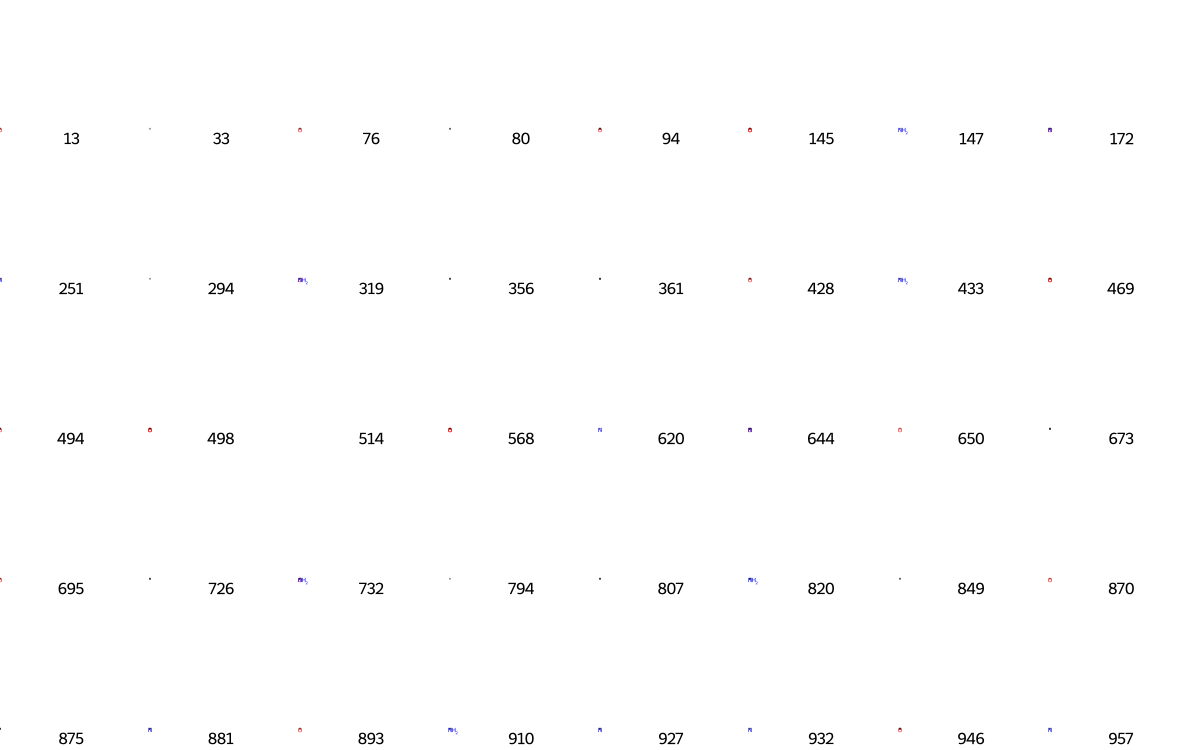

In [2805]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2806]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 33,
 80,
 118,
 144,
 145,
 147,
 254,
 283,
 356,
 361,
 401,
 433,
 498,
 606,
 650,
 673,
 695,
 726,
 727,
 780,
 807,
 823,
 849,
 888,
 893]

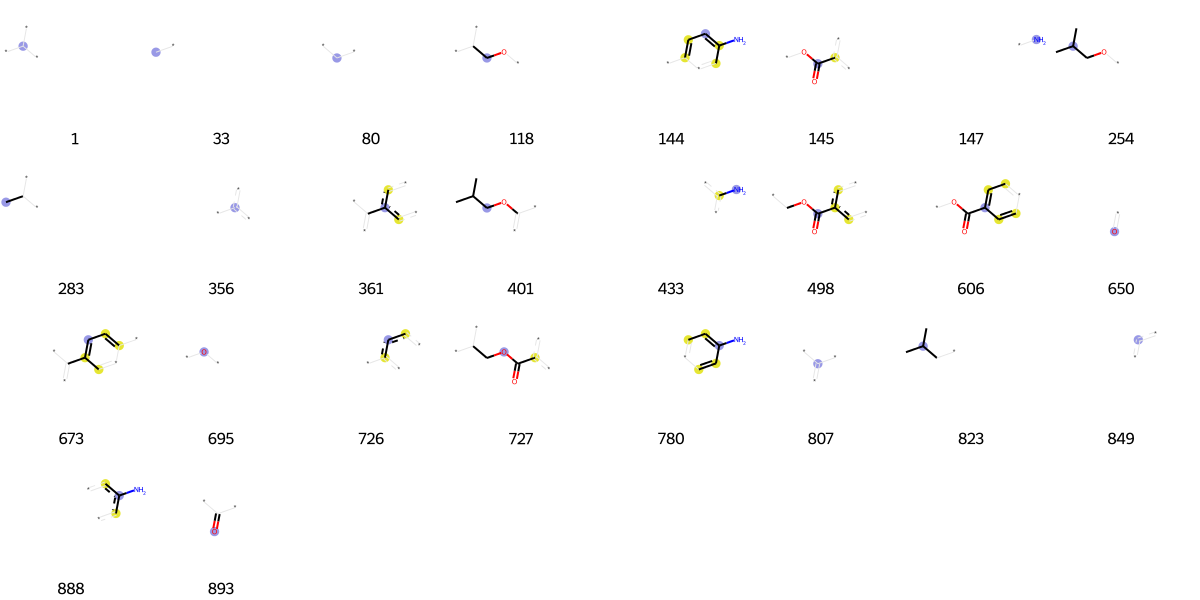

In [2807]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2808]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 23,
 64,
 77,
 80,
 117,
 146,
 147,
 168,
 175,
 225,
 314,
 325,
 356,
 389,
 403,
 423,
 431,
 456,
 532,
 559,
 573,
 650,
 655,
 660,
 669,
 726,
 741,
 771,
 786,
 802,
 807,
 818,
 820,
 825,
 849,
 893,
 898,
 903,
 935,
 967,
 1002]

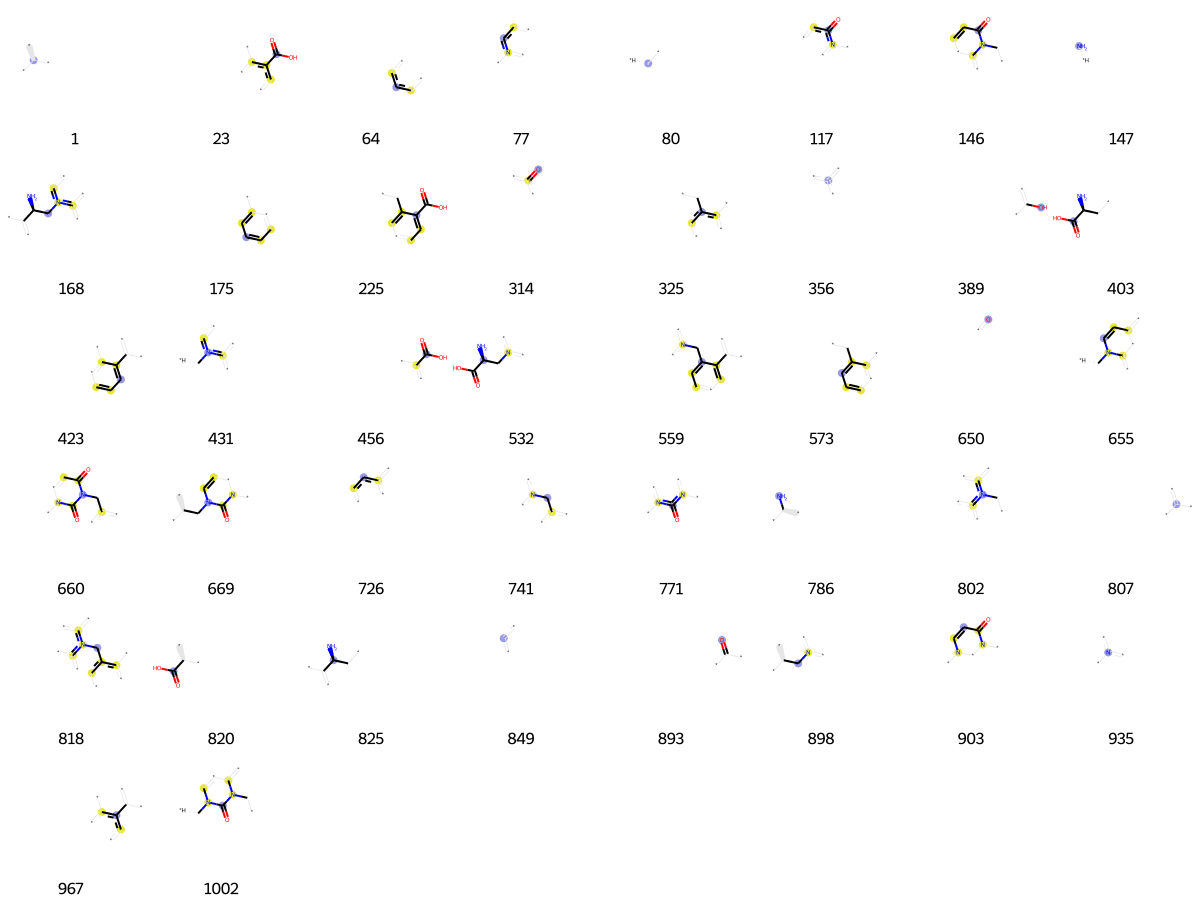

In [2809]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2810]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[14,
 33,
 54,
 64,
 81,
 114,
 121,
 125,
 134,
 139,
 151,
 175,
 207,
 212,
 217,
 224,
 236,
 352,
 356,
 367,
 378,
 392,
 393,
 407,
 428,
 429,
 445,
 456,
 484,
 506,
 511,
 527,
 650,
 698,
 700,
 726,
 786,
 807,
 809,
 825,
 845,
 849,
 875,
 877,
 881,
 893,
 896,
 903,
 904,
 926,
 935,
 969,
 975,
 984,
 994,
 1022]

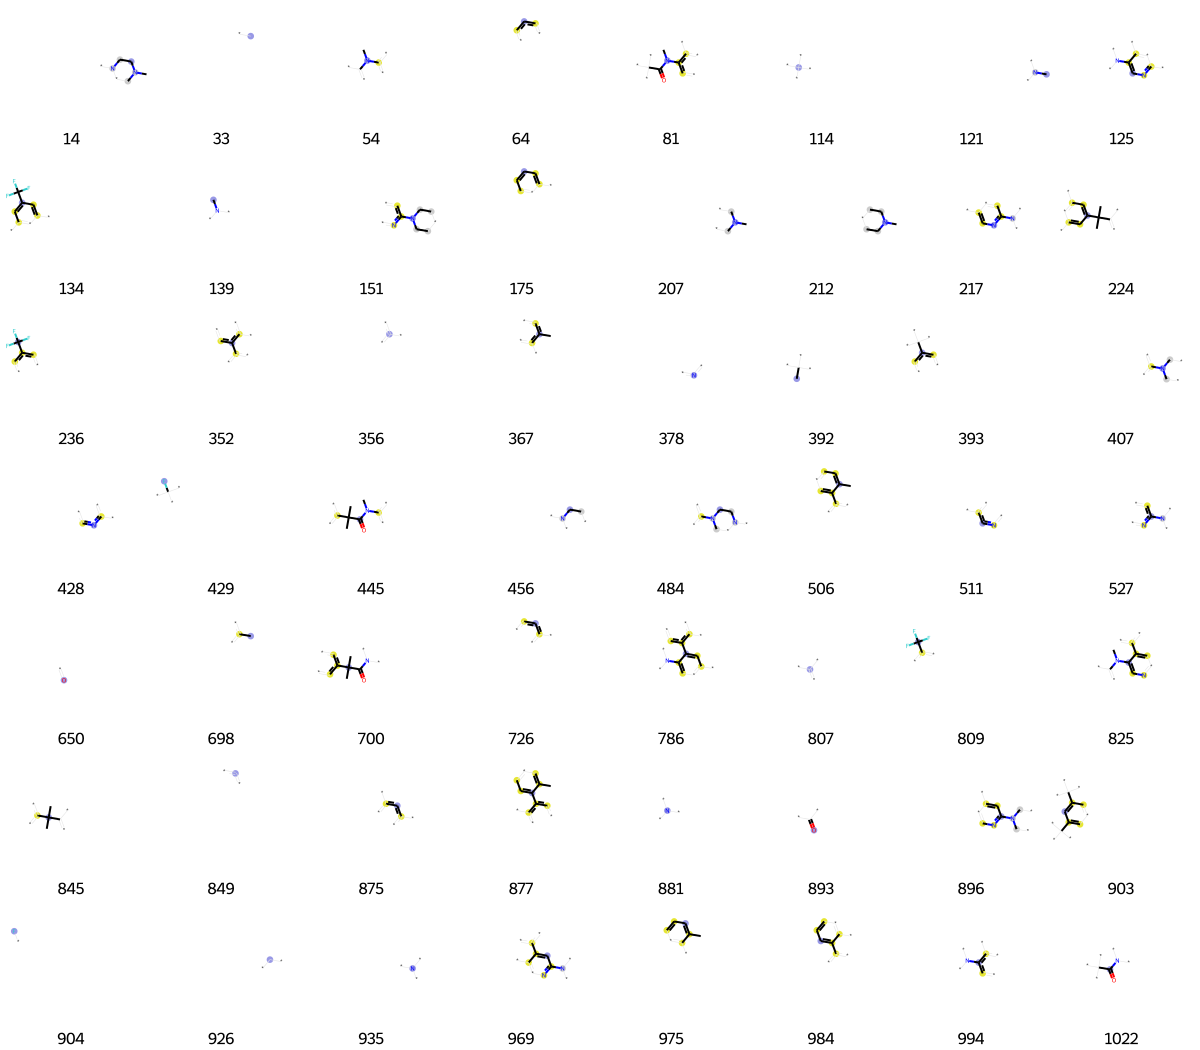

In [2811]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2812]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 5,
 10,
 33,
 64,
 73,
 90,
 116,
 121,
 128,
 154,
 168,
 175,
 198,
 206,
 219,
 230,
 236,
 250,
 253,
 282,
 283,
 285,
 286,
 288,
 289,
 301,
 303,
 314,
 356,
 363,
 369,
 370,
 377,
 378,
 387,
 394,
 420,
 428,
 441,
 481,
 486,
 494,
 511,
 552,
 612,
 641,
 650,
 656,
 664,
 675,
 711,
 726,
 749,
 781,
 782,
 796,
 804,
 807,
 831,
 849,
 855,
 878,
 893,
 899,
 926,
 927,
 935,
 939,
 941,
 956,
 976,
 984,
 998,
 1003,
 1019,
 1022]

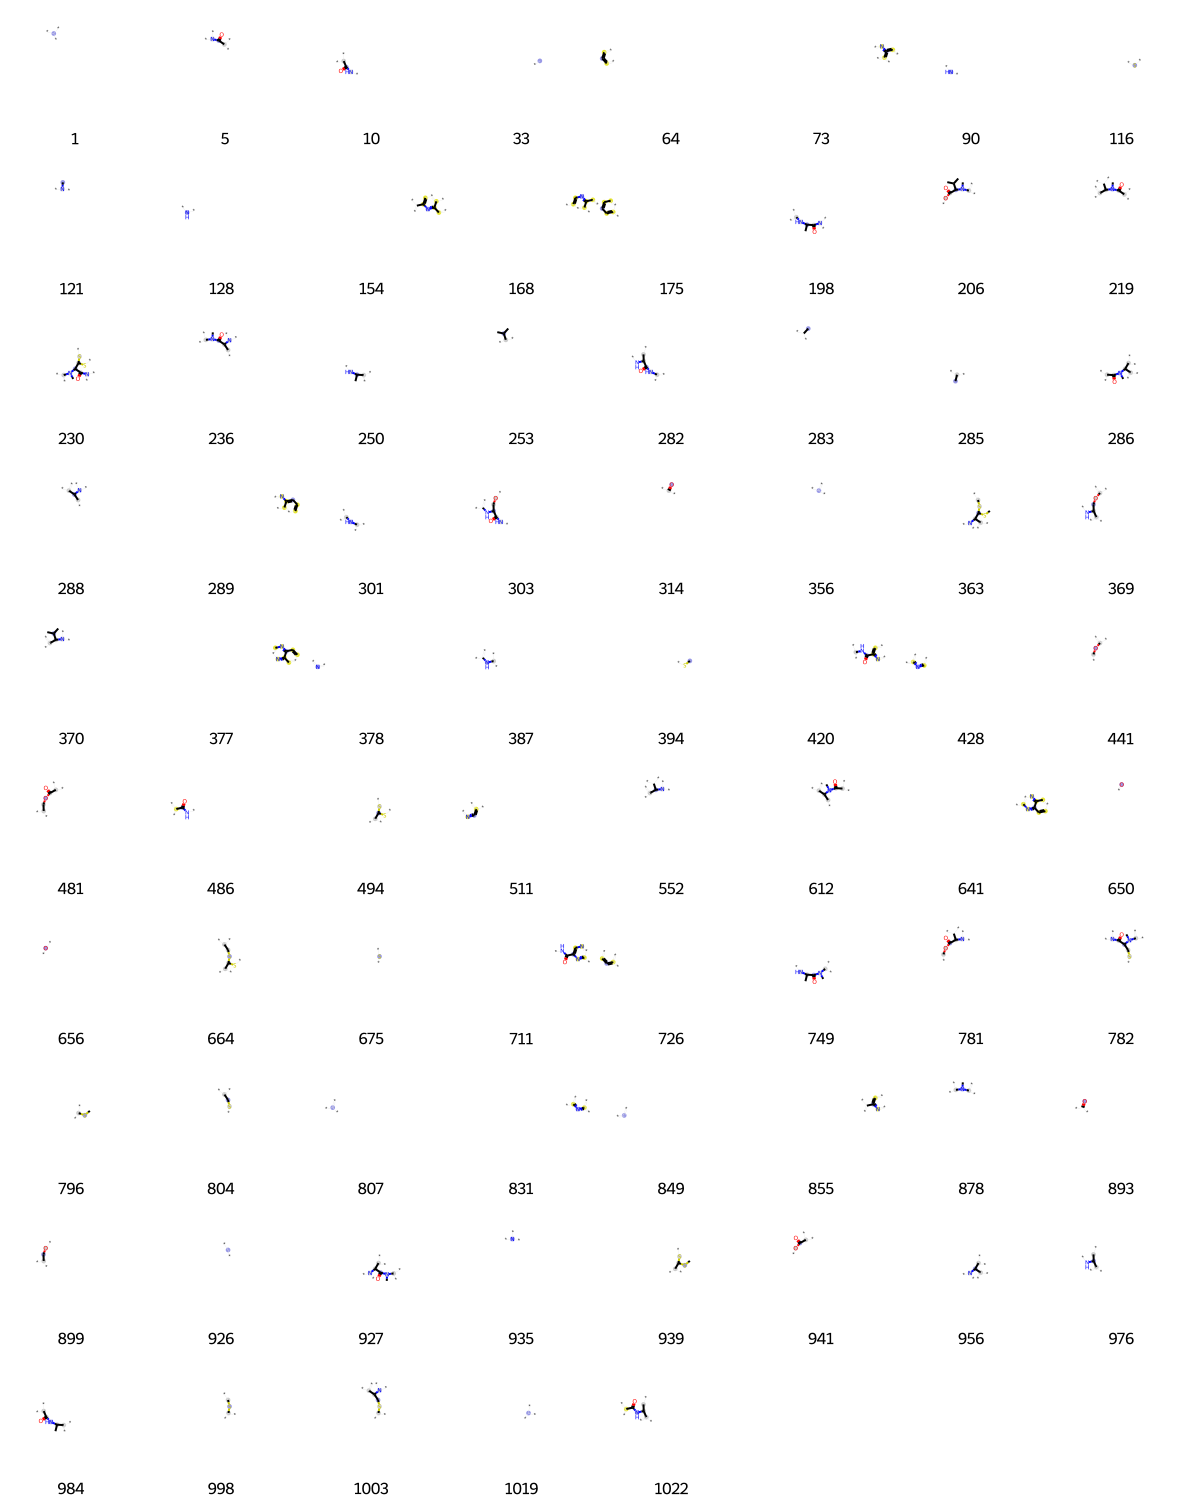

In [2813]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2814]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 68,
 80,
 94,
 114,
 123,
 128,
 136,
 139,
 150,
 181,
 184,
 191,
 200,
 201,
 237,
 257,
 262,
 277,
 301,
 302,
 317,
 325,
 356,
 361,
 367,
 378,
 419,
 428,
 429,
 456,
 463,
 486,
 489,
 491,
 511,
 526,
 541,
 544,
 555,
 558,
 579,
 595,
 625,
 650,
 658,
 667,
 673,
 698,
 717,
 719,
 726,
 739,
 741,
 767,
 768,
 771,
 792,
 807,
 809,
 843,
 849,
 875,
 881,
 893,
 904,
 926,
 932,
 935,
 954,
 1019]

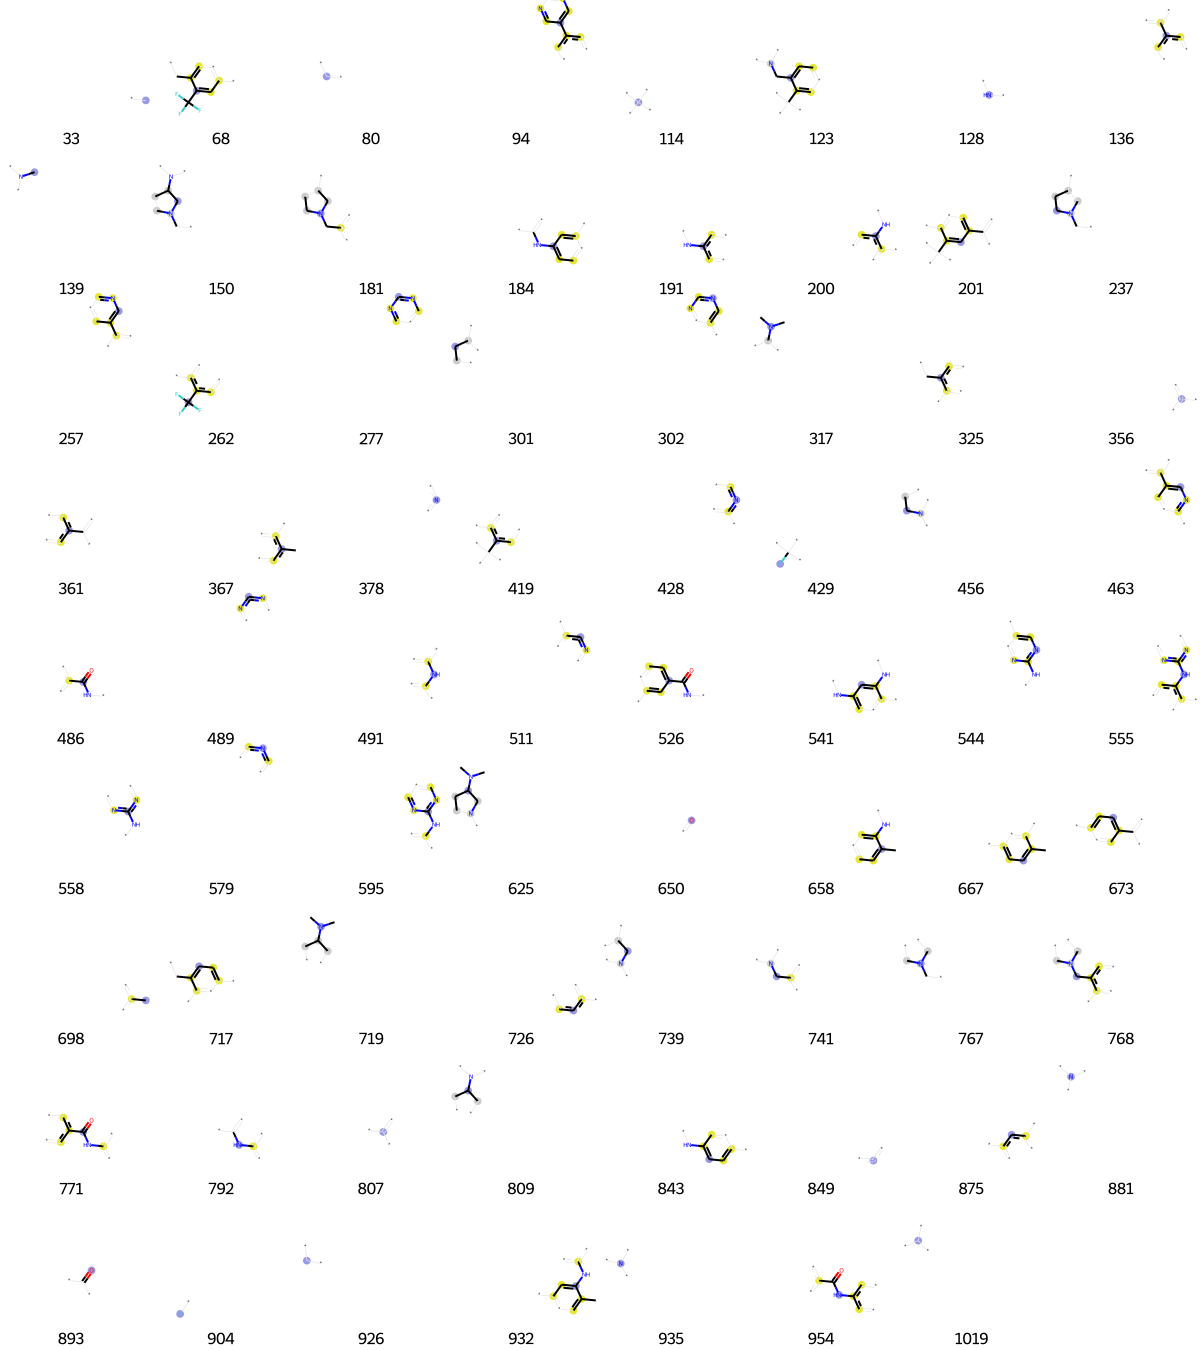

In [2815]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2816]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[5,
 33,
 39,
 42,
 51,
 64,
 80,
 128,
 140,
 147,
 186,
 189,
 202,
 209,
 231,
 233,
 243,
 255,
 286,
 314,
 356,
 387,
 398,
 417,
 431,
 440,
 470,
 474,
 484,
 487,
 544,
 547,
 614,
 621,
 644,
 650,
 653,
 656,
 675,
 695,
 698,
 715,
 725,
 726,
 730,
 745,
 753,
 762,
 787,
 792,
 807,
 841,
 849,
 859,
 869,
 872,
 882,
 893,
 898,
 902,
 926,
 935,
 998,
 1008,
 1019]

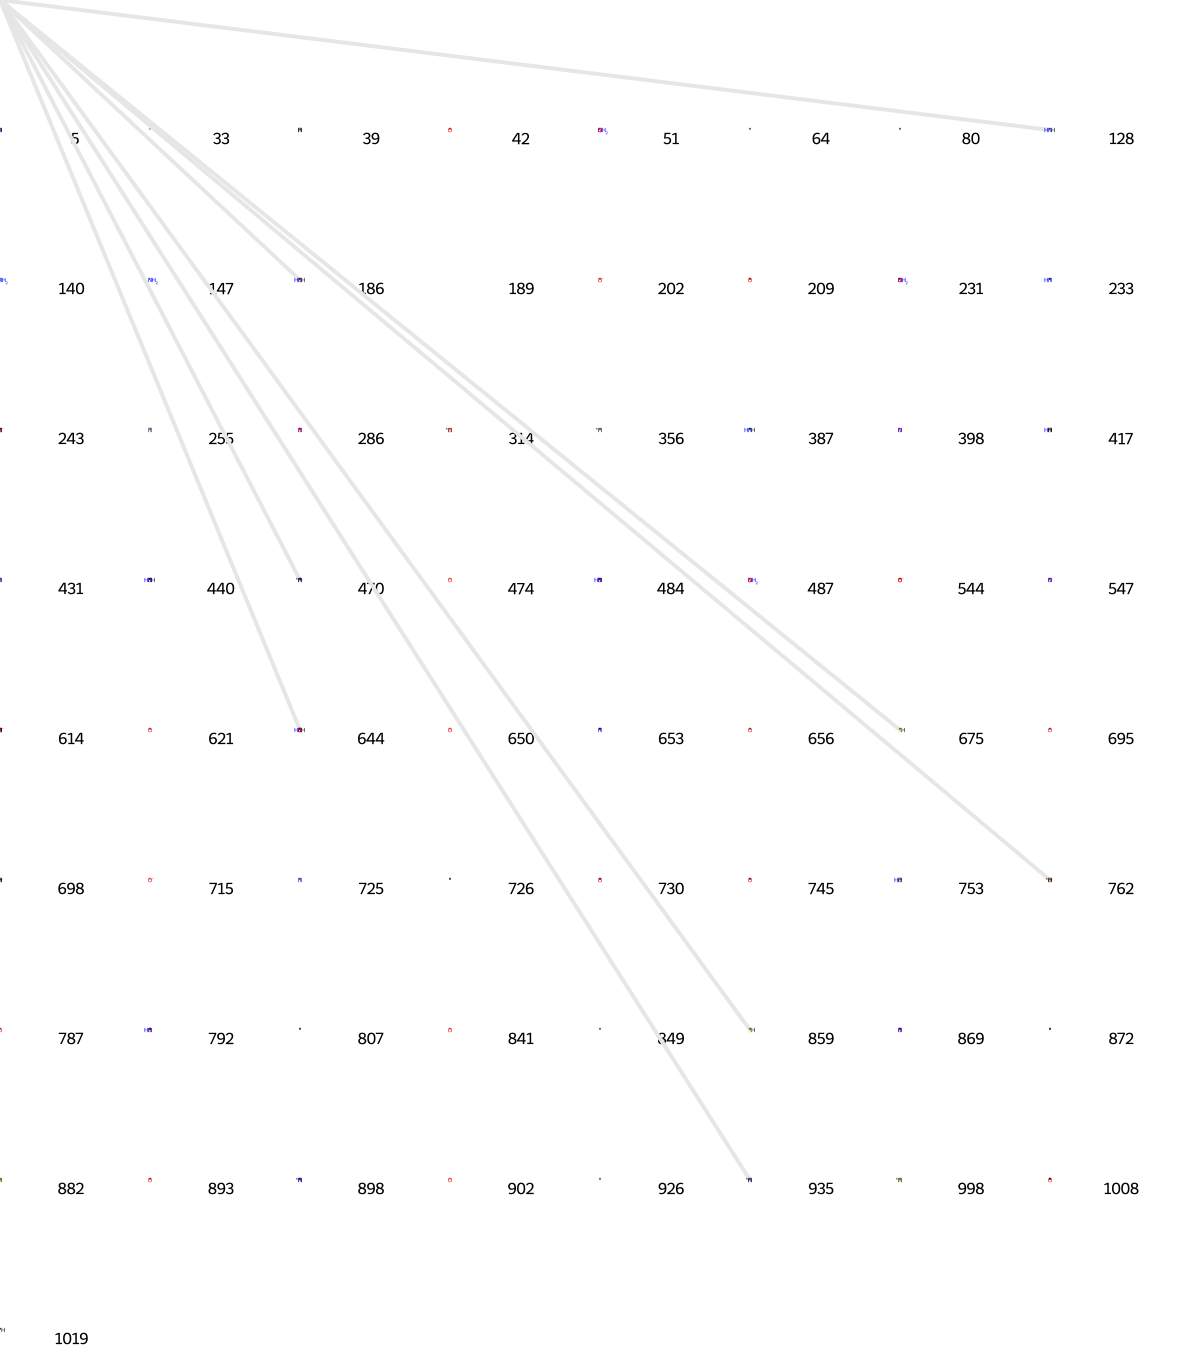

In [2817]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2818]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[45,
 71,
 73,
 75,
 80,
 130,
 147,
 152,
 194,
 210,
 220,
 222,
 233,
 356,
 378,
 428,
 433,
 435,
 454,
 463,
 492,
 575,
 577,
 610,
 648,
 656,
 700,
 726,
 740,
 787,
 807,
 820,
 842,
 849,
 897,
 932,
 935,
 962,
 1019]

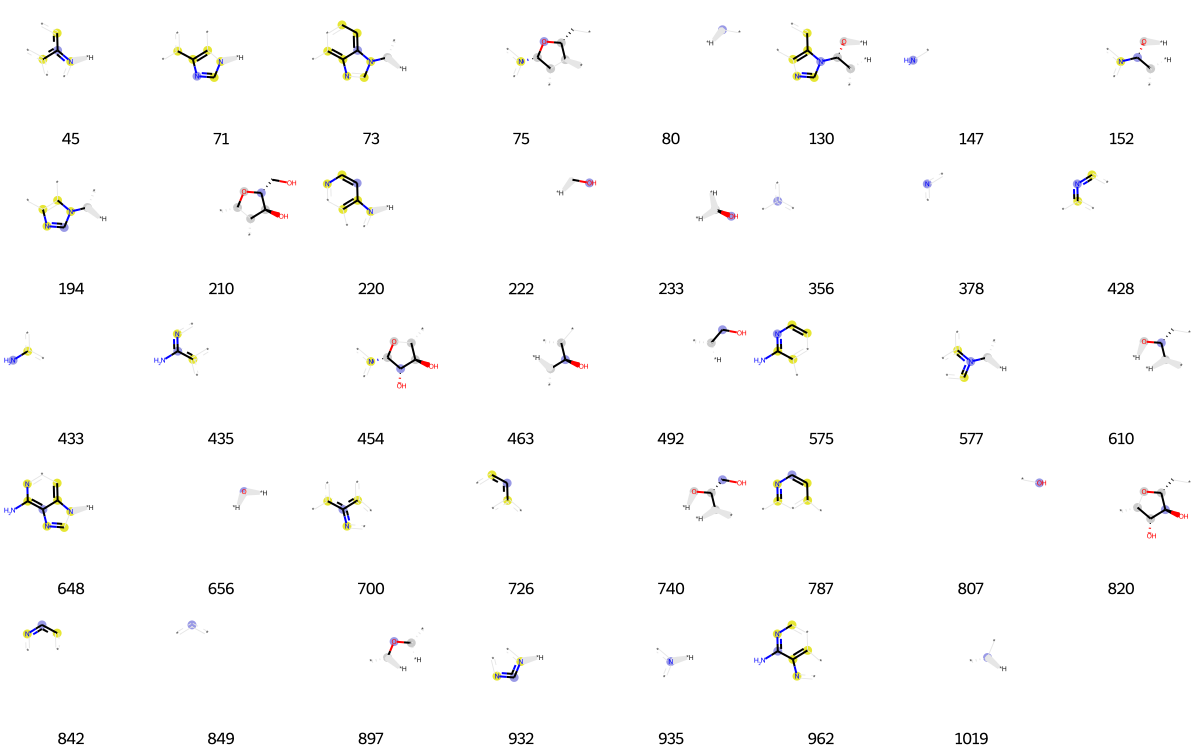

In [2819]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2820]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[33,
 64,
 79,
 80,
 103,
 112,
 128,
 140,
 147,
 165,
 175,
 177,
 214,
 236,
 242,
 249,
 270,
 287,
 294,
 304,
 335,
 356,
 362,
 386,
 411,
 428,
 456,
 462,
 512,
 650,
 666,
 675,
 695,
 698,
 726,
 789,
 807,
 841,
 849,
 893,
 926,
 935,
 946,
 998,
 1009,
 1019]

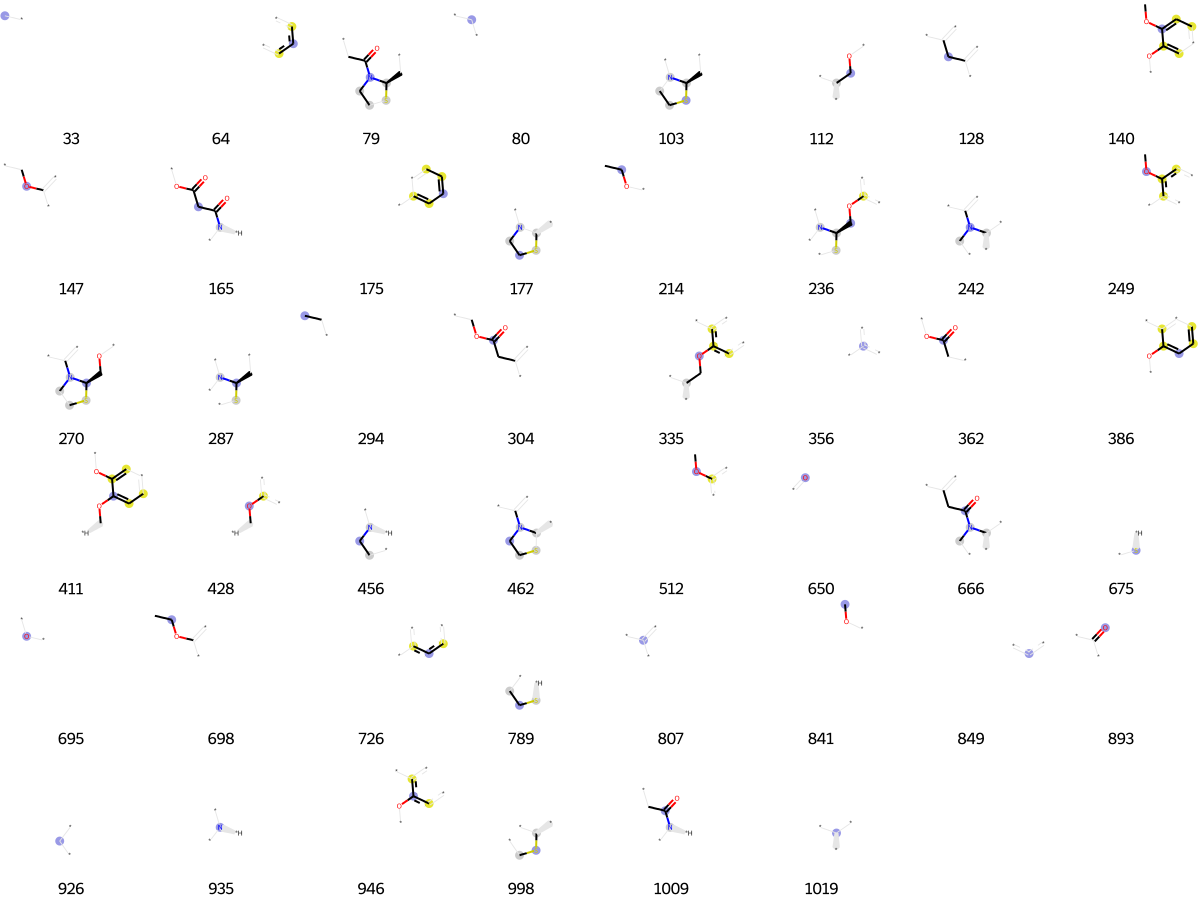

In [2821]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2822]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[7,
 15,
 33,
 36,
 71,
 75,
 84,
 130,
 138,
 166,
 182,
 195,
 212,
 248,
 250,
 289,
 301,
 356,
 364,
 378,
 384,
 403,
 408,
 412,
 418,
 441,
 504,
 507,
 511,
 519,
 529,
 555,
 614,
 622,
 649,
 656,
 674,
 714,
 724,
 807,
 812,
 849,
 860,
 903,
 909,
 915,
 926,
 940,
 952,
 974,
 1019]

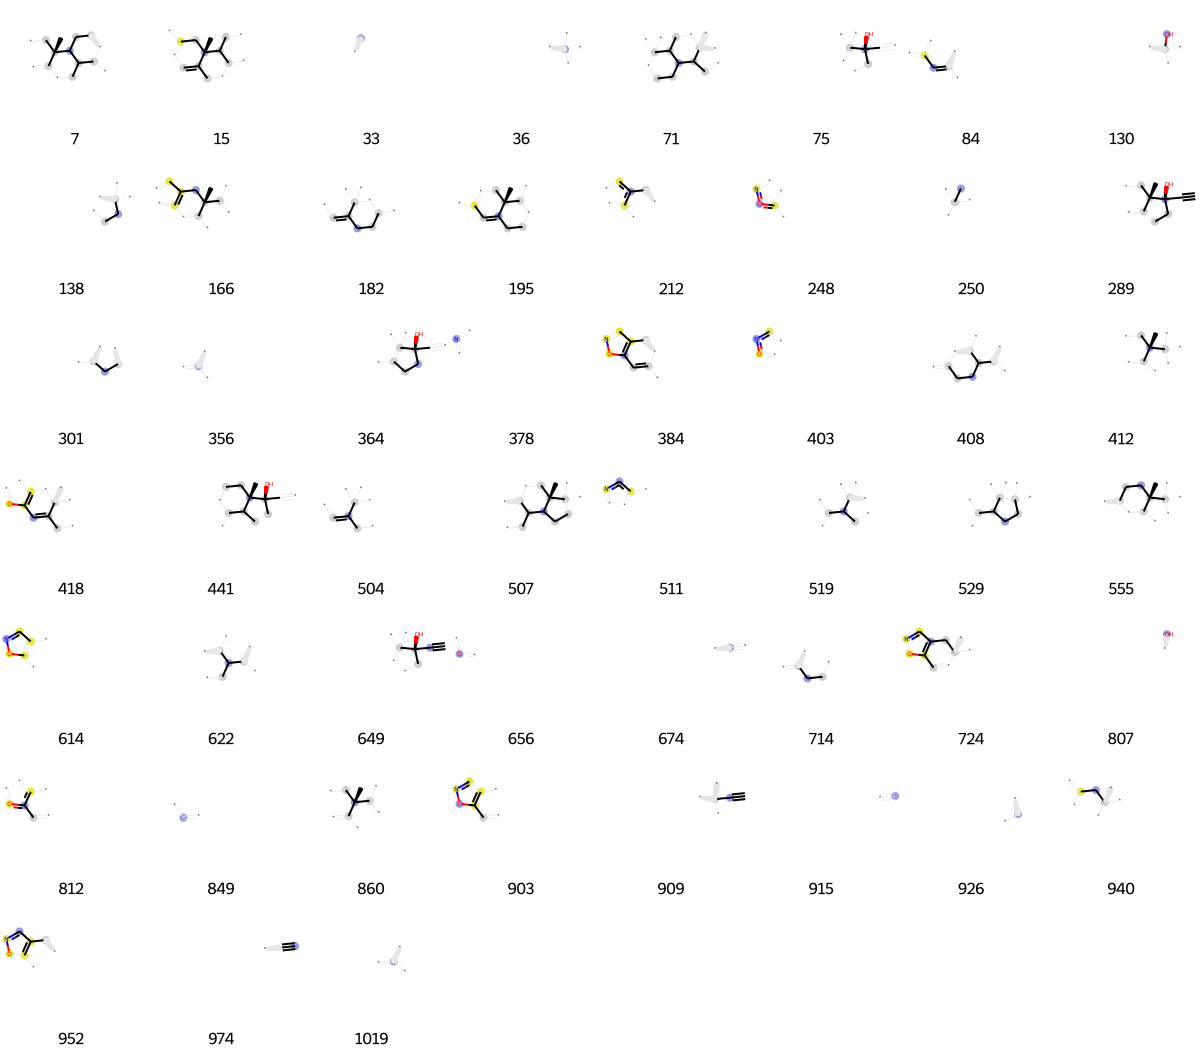

In [2823]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2824]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[31,
 33,
 64,
 66,
 80,
 114,
 139,
 145,
 147,
 175,
 203,
 212,
 249,
 282,
 294,
 295,
 303,
 315,
 333,
 350,
 356,
 361,
 389,
 393,
 428,
 487,
 498,
 508,
 512,
 575,
 650,
 656,
 670,
 694,
 695,
 726,
 807,
 841,
 849,
 865,
 868,
 875,
 881,
 893,
 946,
 976,
 993,
 1015]

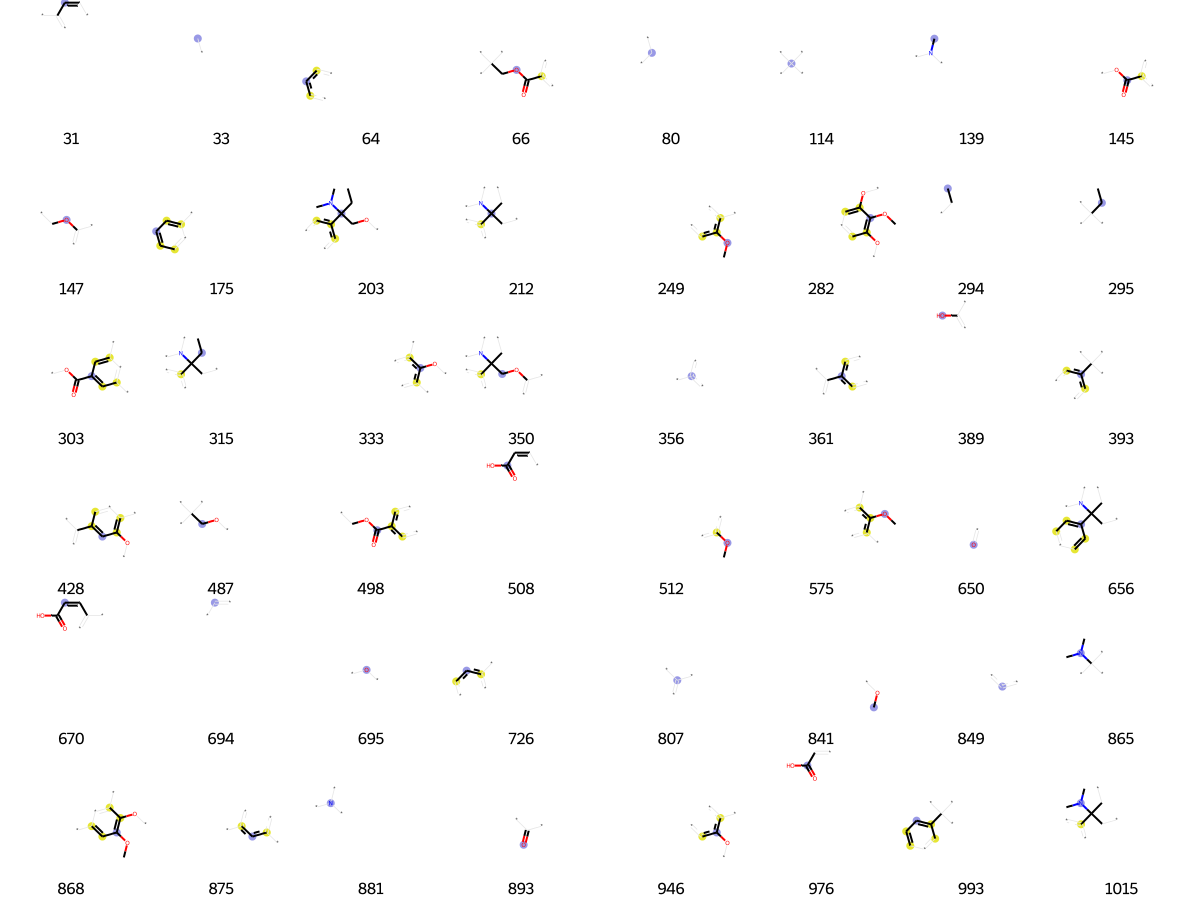

In [2825]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2826]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[2,
 4,
 10,
 33,
 36,
 41,
 80,
 90,
 102,
 138,
 204,
 250,
 252,
 310,
 314,
 322,
 356,
 360,
 384,
 419,
 424,
 428,
 432,
 458,
 563,
 614,
 620,
 650,
 675,
 695,
 718,
 726,
 730,
 731,
 770,
 807,
 816,
 849,
 862,
 926,
 987,
 1019]

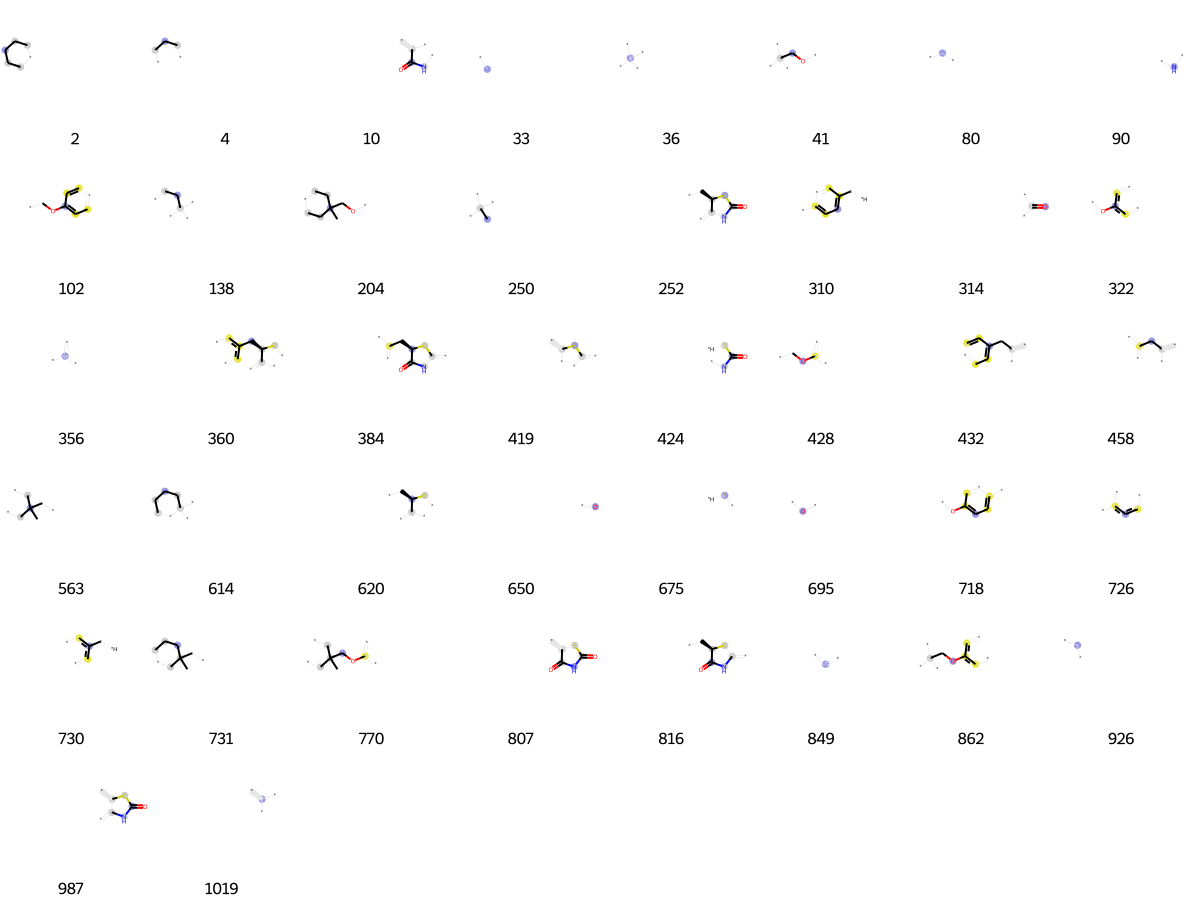

In [2827]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2828]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 9,
 19,
 33,
 42,
 58,
 64,
 69,
 80,
 102,
 114,
 125,
 145,
 160,
 214,
 233,
 237,
 260,
 283,
 294,
 310,
 314,
 317,
 322,
 325,
 333,
 335,
 356,
 378,
 385,
 428,
 429,
 437,
 448,
 504,
 507,
 511,
 519,
 521,
 548,
 549,
 560,
 562,
 578,
 579,
 600,
 645,
 650,
 667,
 695,
 718,
 726,
 730,
 787,
 795,
 801,
 807,
 831,
 837,
 842,
 849,
 881,
 893,
 904,
 913,
 930,
 935,
 969,
 1006]

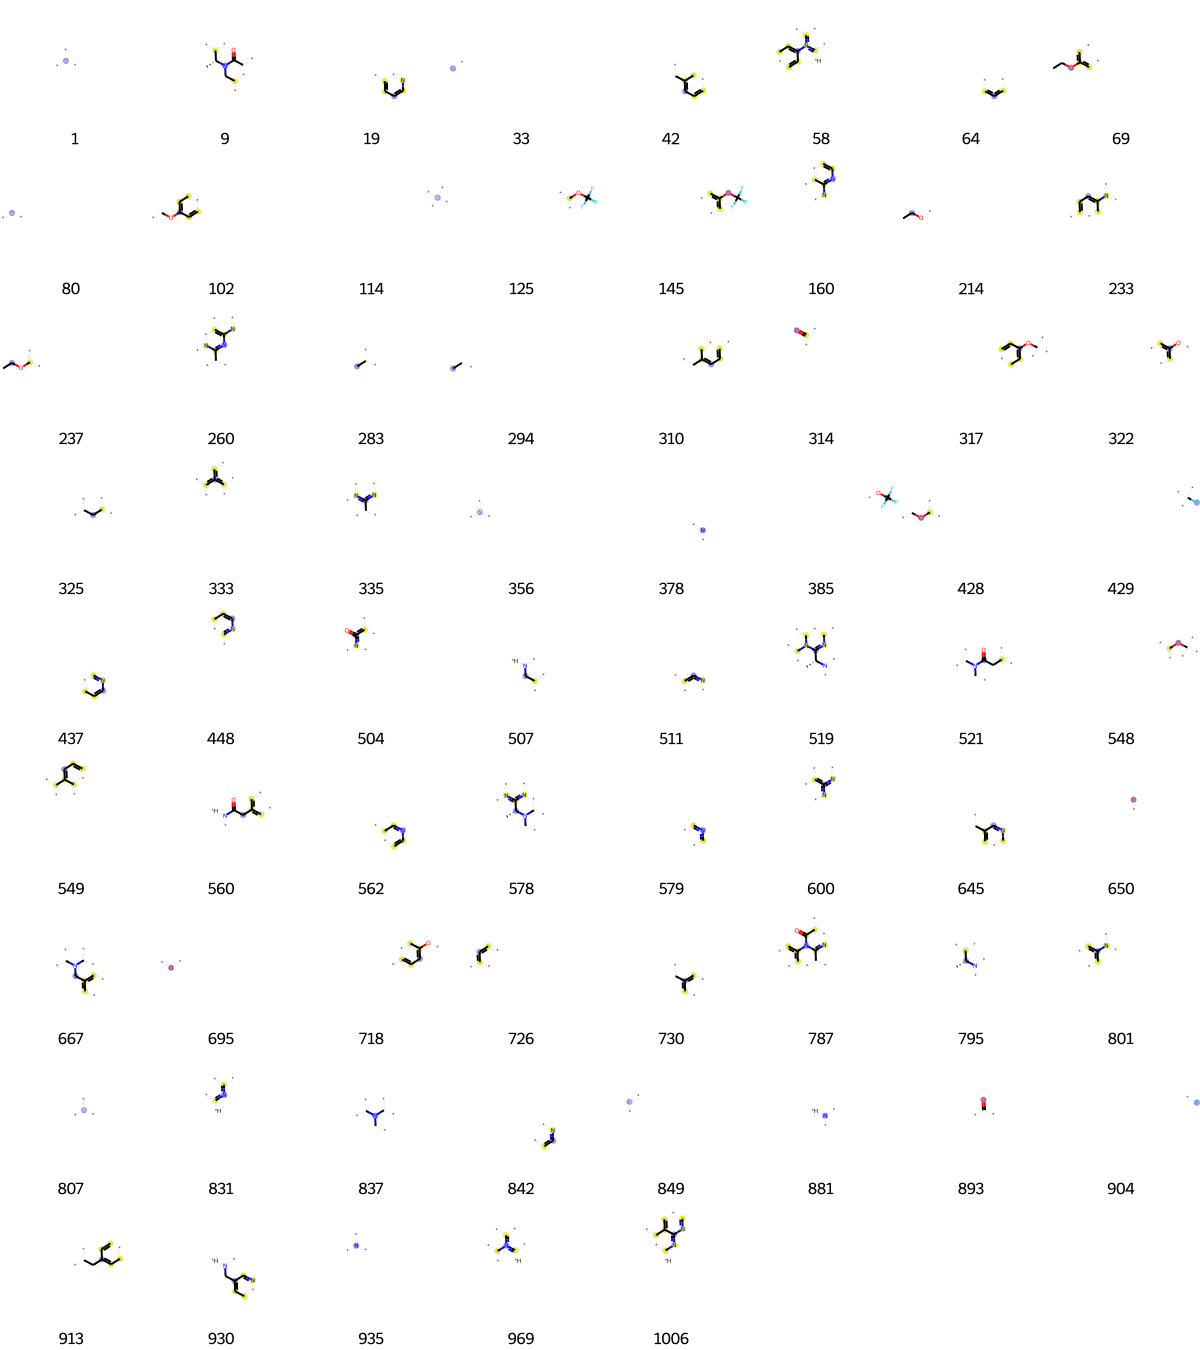

In [2829]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2830]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 64,
 116,
 140,
 147,
 175,
 230,
 258,
 292,
 356,
 360,
 377,
 433,
 458,
 494,
 593,
 662,
 674,
 704,
 726,
 769,
 790,
 798,
 803,
 807,
 849,
 910]

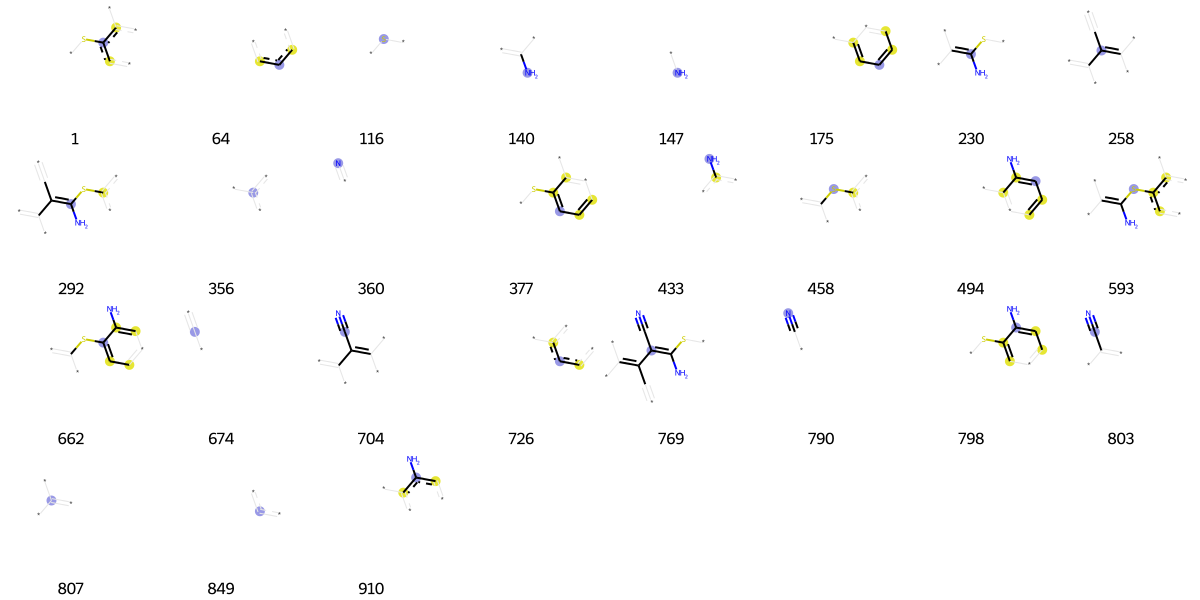

In [2831]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2832]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[64,
 66,
 73,
 90,
 113,
 175,
 289,
 314,
 333,
 356,
 378,
 428,
 549,
 629,
 650,
 662,
 713,
 726,
 750,
 806,
 834,
 849,
 940]

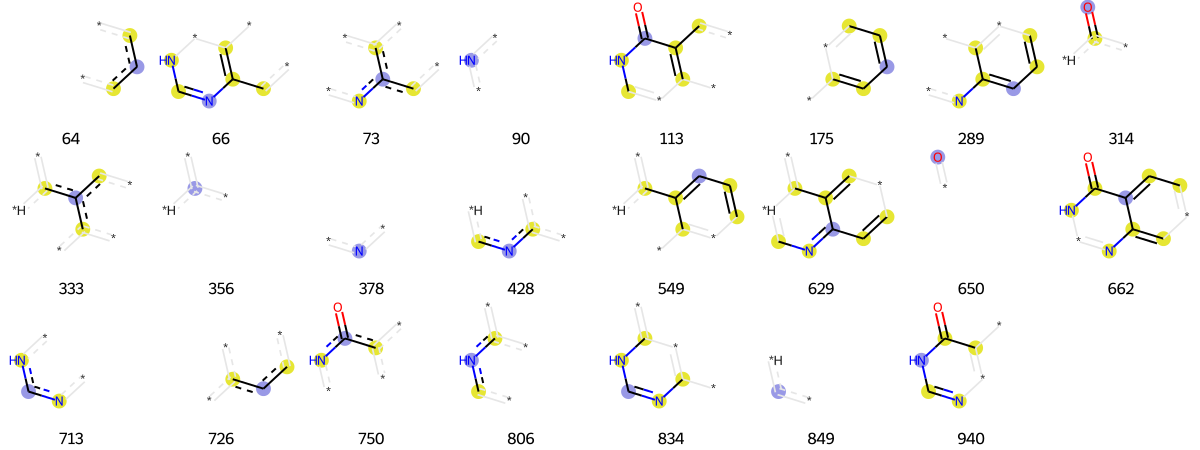

In [2833]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2834]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[14,
 33,
 80,
 94,
 128,
 136,
 142,
 152,
 197,
 232,
 236,
 238,
 249,
 255,
 257,
 266,
 293,
 352,
 356,
 378,
 388,
 401,
 428,
 444,
 486,
 511,
 512,
 529,
 543,
 554,
 579,
 589,
 637,
 650,
 675,
 695,
 698,
 724,
 726,
 743,
 772,
 799,
 807,
 813,
 818,
 831,
 840,
 841,
 842,
 849,
 875,
 893,
 905,
 910,
 946,
 967,
 980,
 986,
 1003,
 1011]

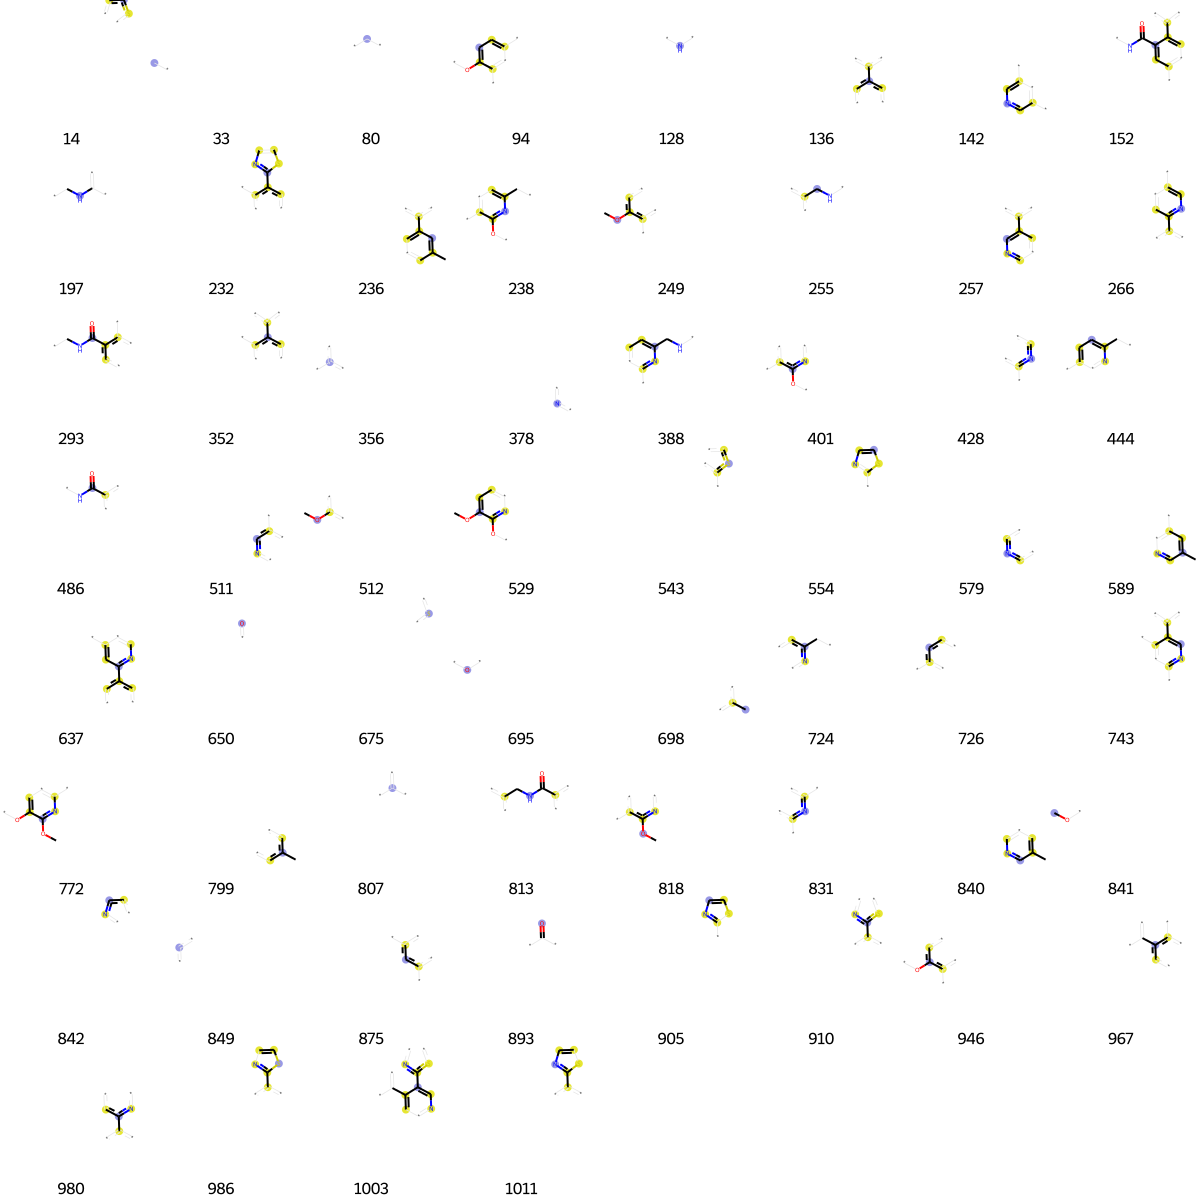

In [2835]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [2836]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[0,
 4,
 29,
 33,
 42,
 64,
 73,
 80,
 92,
 121,
 147,
 151,
 158,
 175,
 182,
 190,
 197,
 289,
 298,
 301,
 314,
 333,
 341,
 351,
 356,
 378,
 389,
 407,
 416,
 419,
 446,
 456,
 484,
 487,
 501,
 504,
 517,
 549,
 564,
 611,
 612,
 618,
 650,
 657,
 672,
 674,
 680,
 698,
 726,
 739,
 740,
 741,
 771,
 802,
 808,
 831,
 838,
 849,
 855,
 862,
 883,
 888,
 926,
 935,
 976,
 1019]

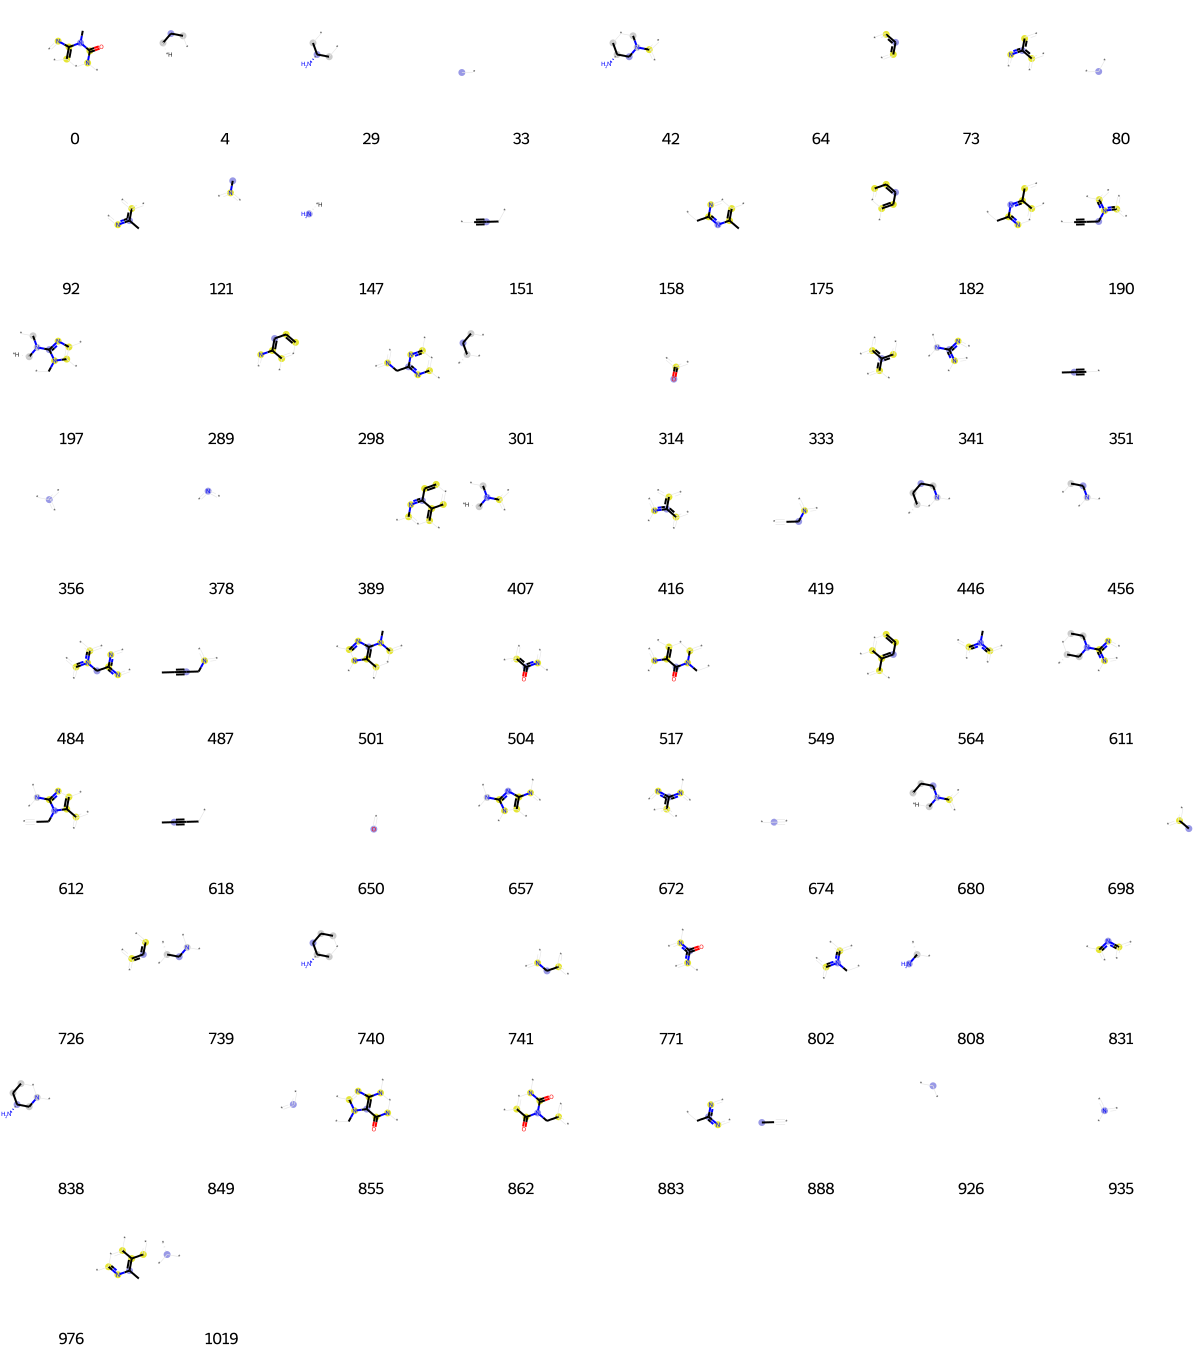

In [2837]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2838]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[25,
 33,
 64,
 117,
 175,
 235,
 236,
 246,
 295,
 314,
 352,
 356,
 376,
 389,
 464,
 564,
 650,
 698,
 726,
 799,
 801,
 849,
 925,
 935]

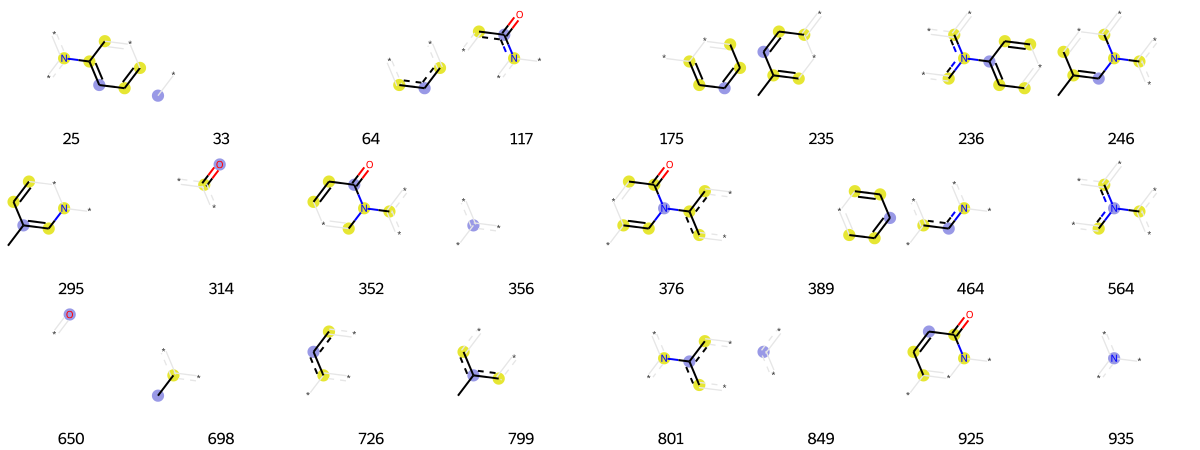

In [2839]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2840]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[36,
 64,
 165,
 175,
 207,
 289,
 356,
 399,
 404,
 436,
 469,
 472,
 484,
 504,
 556,
 563,
 578,
 604,
 641,
 650,
 656,
 706,
 726,
 745,
 754,
 807,
 837,
 849,
 924,
 956]

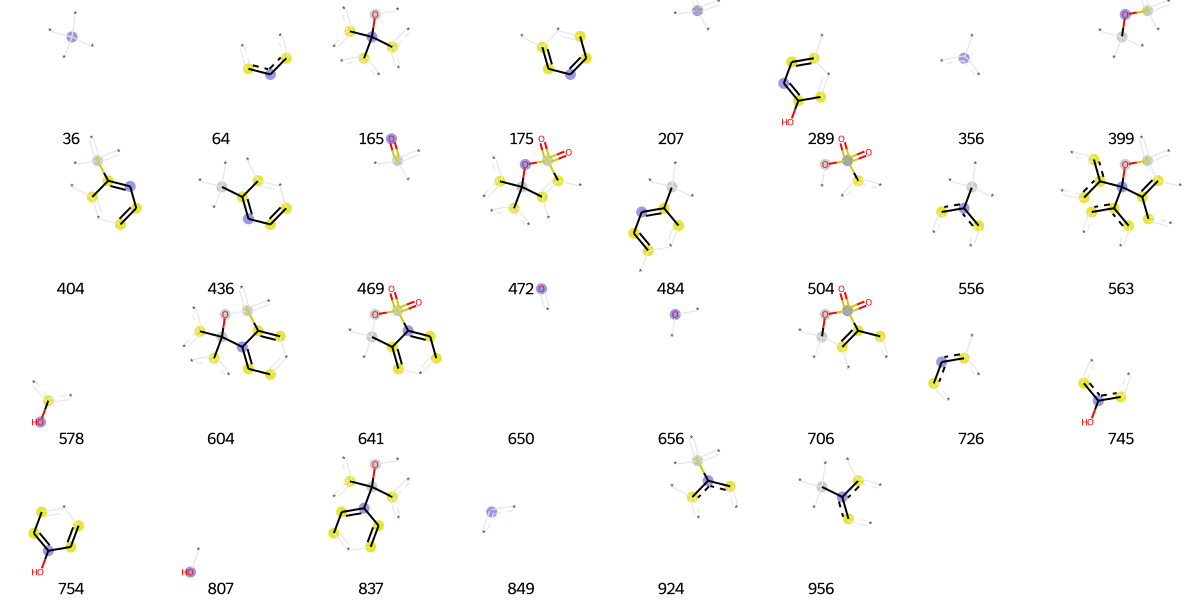

In [2841]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [2842]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[2,
 4,
 33,
 55,
 80,
 119,
 128,
 145,
 147,
 200,
 214,
 294,
 301,
 356,
 361,
 428,
 433,
 450,
 469,
 498,
 524,
 565,
 610,
 650,
 673,
 695,
 698,
 726,
 759,
 807,
 820,
 832,
 849,
 875,
 890,
 893,
 910,
 926,
 1019]

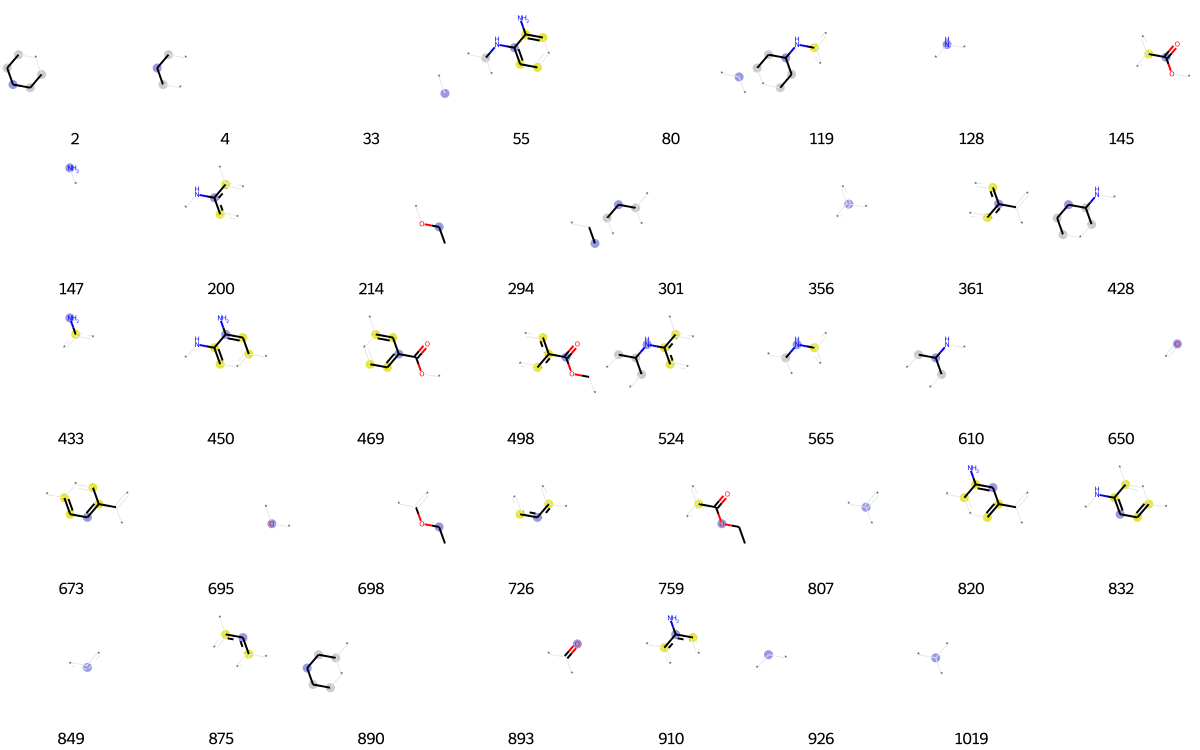

In [2843]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2844]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[8,
 15,
 31,
 33,
 37,
 64,
 80,
 94,
 128,
 136,
 139,
 181,
 191,
 197,
 232,
 246,
 249,
 265,
 350,
 356,
 361,
 392,
 452,
 486,
 493,
 502,
 503,
 512,
 526,
 558,
 608,
 629,
 650,
 667,
 695,
 698,
 703,
 726,
 736,
 743,
 744,
 775,
 785,
 789,
 799,
 806,
 807,
 837,
 841,
 849,
 875,
 881,
 893,
 896,
 904,
 929,
 946,
 960,
 961,
 1013]

In [2845]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 36,
 65,
 111,
 157,
 250,
 274,
 301,
 314,
 356,
 465,
 650,
 656,
 696,
 706,
 723,
 767,
 786,
 897,
 926,
 1019]

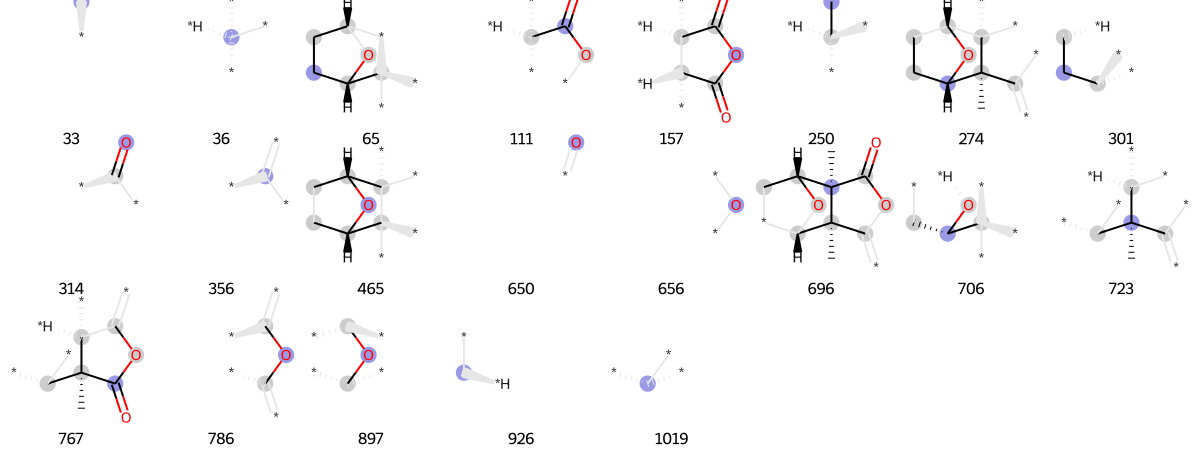

In [2846]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2847]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[19,
 33,
 63,
 64,
 67,
 72,
 73,
 80,
 99,
 115,
 128,
 136,
 310,
 345,
 356,
 363,
 378,
 406,
 412,
 422,
 428,
 430,
 448,
 486,
 511,
 528,
 613,
 625,
 636,
 650,
 699,
 710,
 726,
 730,
 738,
 773,
 806,
 807,
 813,
 816,
 831,
 842,
 845,
 849,
 851,
 875,
 878,
 893,
 896,
 904,
 905,
 922,
 930,
 932,
 935,
 944,
 961,
 967,
 980]

In [2848]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 13,
 14,
 33,
 42,
 46,
 64,
 74,
 79,
 80,
 88,
 97,
 117,
 121,
 128,
 147,
 175,
 202,
 207,
 212,
 214,
 229,
 294,
 317,
 328,
 333,
 356,
 366,
 389,
 411,
 428,
 434,
 456,
 458,
 486,
 506,
 533,
 561,
 578,
 615,
 650,
 659,
 695,
 698,
 726,
 730,
 736,
 767,
 794,
 807,
 808,
 849,
 857,
 875,
 893,
 926,
 935,
 967,
 982,
 1011,
 1021]

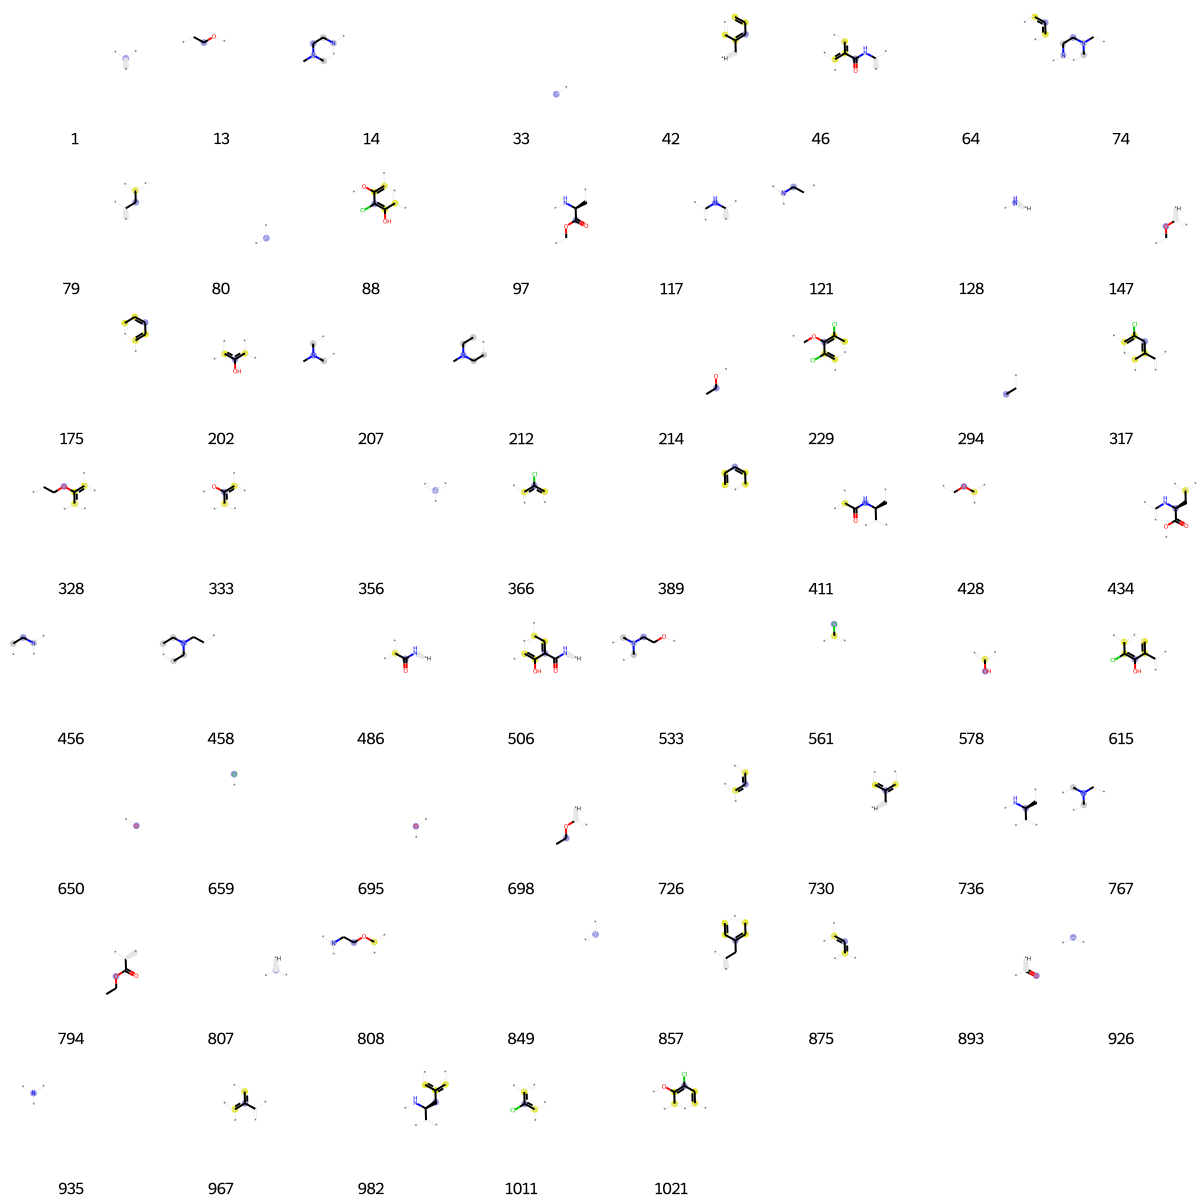

In [2849]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2850]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 33,
 41,
 42,
 48,
 64,
 69,
 80,
 86,
 116,
 117,
 128,
 147,
 175,
 189,
 214,
 216,
 283,
 284,
 294,
 301,
 341,
 356,
 389,
 392,
 428,
 494,
 540,
 557,
 573,
 623,
 650,
 670,
 695,
 698,
 726,
 730,
 736,
 739,
 762,
 786,
 794,
 807,
 818,
 825,
 849,
 875,
 893,
 895,
 900,
 919,
 953]

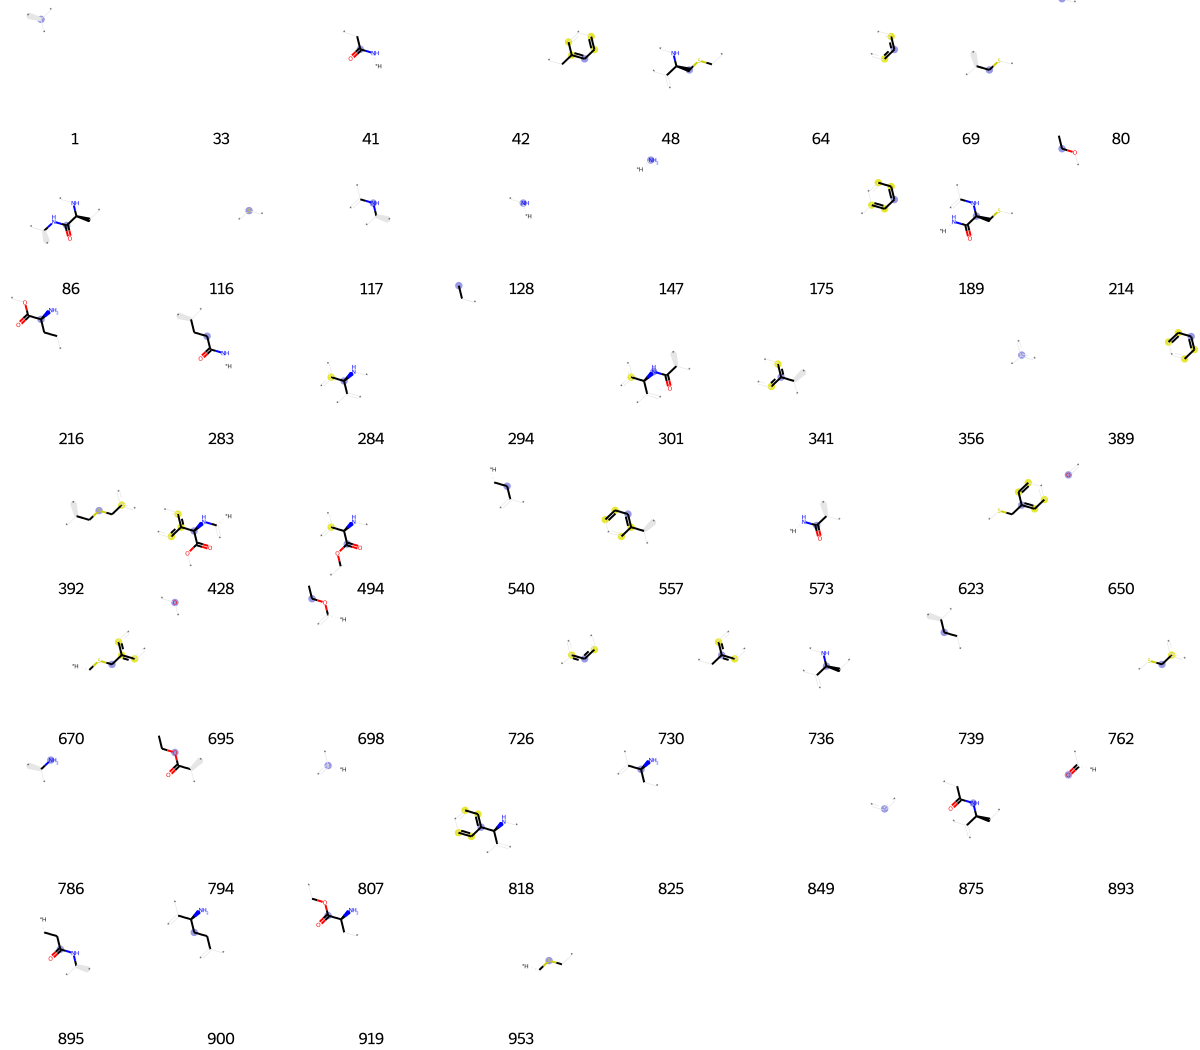

In [2851]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2852]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[33,
 57,
 58,
 64,
 80,
 121,
 128,
 136,
 140,
 175,
 221,
 356,
 367,
 375,
 378,
 381,
 389,
 392,
 415,
 417,
 456,
 458,
 514,
 523,
 625,
 656,
 667,
 698,
 708,
 714,
 726,
 736,
 751,
 767,
 825,
 849,
 875,
 926,
 935,
 942,
 947,
 950,
 980]

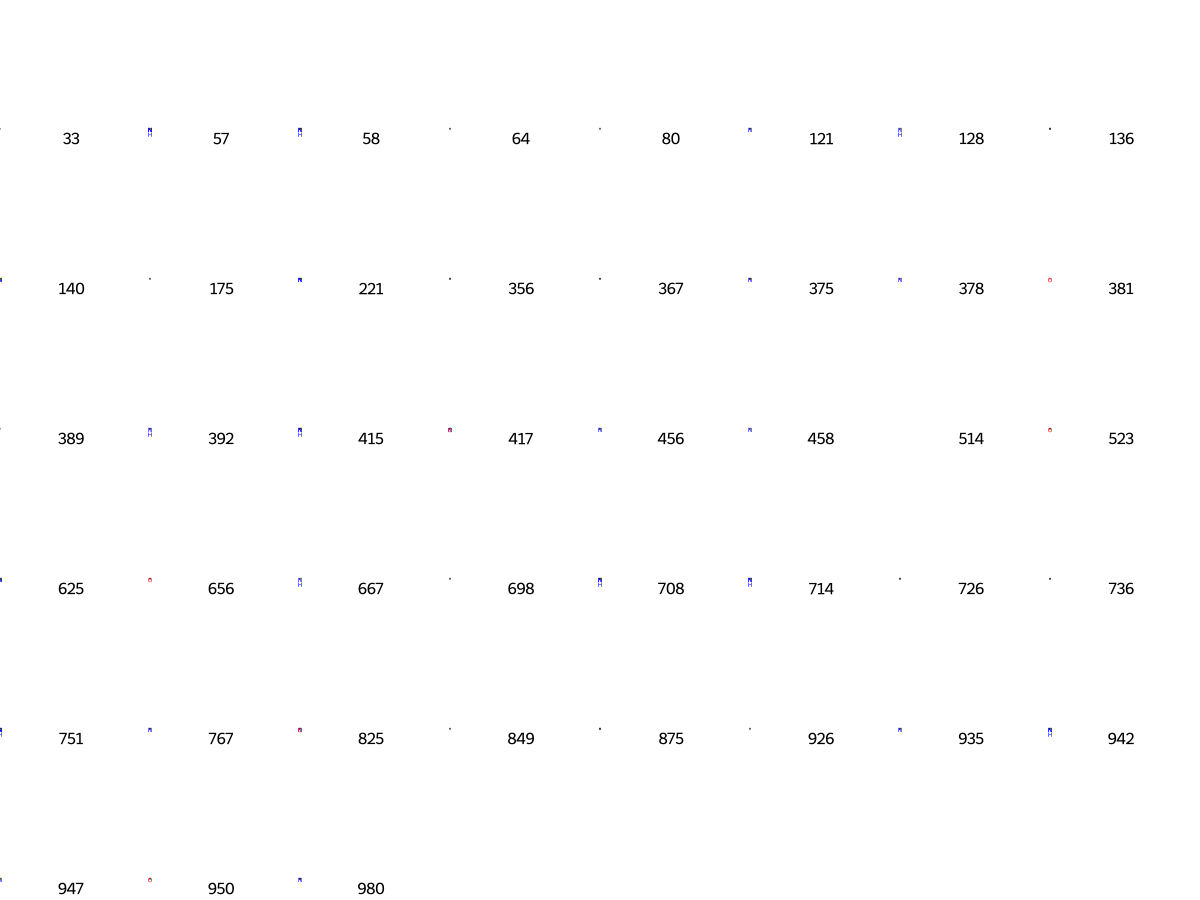

In [2853]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2854]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[64, 65, 175, 356, 389, 578, 726, 745, 754, 807, 849]

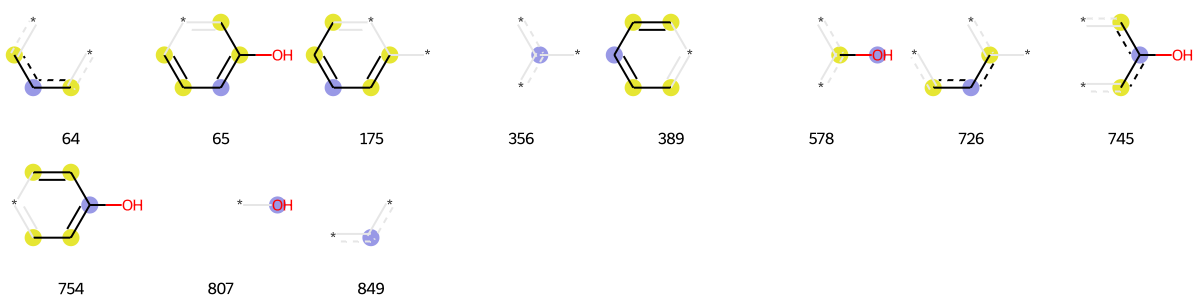

In [2855]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2856]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[4,
 80,
 90,
 222,
 233,
 240,
 268,
 277,
 314,
 356,
 377,
 439,
 445,
 464,
 492,
 577,
 582,
 601,
 605,
 610,
 650,
 656,
 661,
 678,
 721,
 740,
 750,
 758,
 777,
 795,
 807,
 849,
 896,
 897,
 926,
 935,
 947,
 1019]

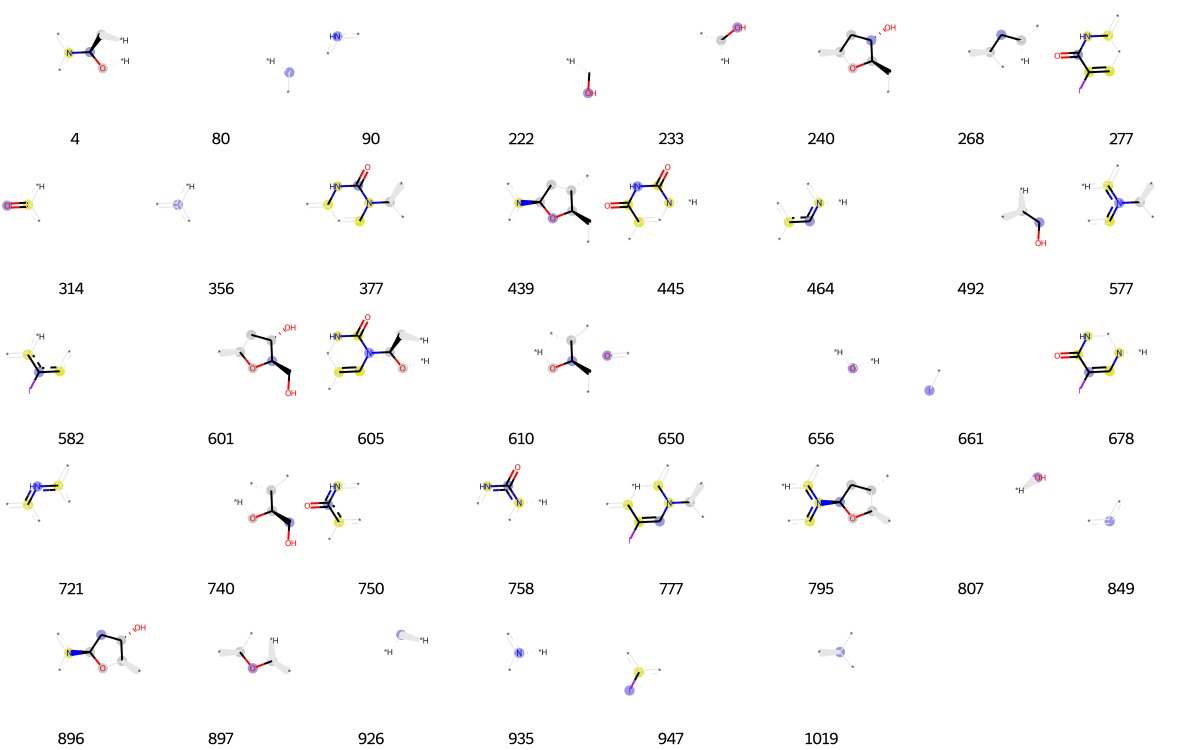

In [2857]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2858]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[11,
 33,
 64,
 80,
 96,
 118,
 139,
 175,
 206,
 212,
 310,
 325,
 331,
 351,
 352,
 356,
 372,
 389,
 401,
 441,
 478,
 514,
 575,
 576,
 609,
 650,
 652,
 656,
 684,
 693,
 694,
 713,
 726,
 730,
 770,
 792,
 798,
 807,
 849,
 875,
 881,
 883,
 893,
 914,
 926,
 927,
 984,
 1005]

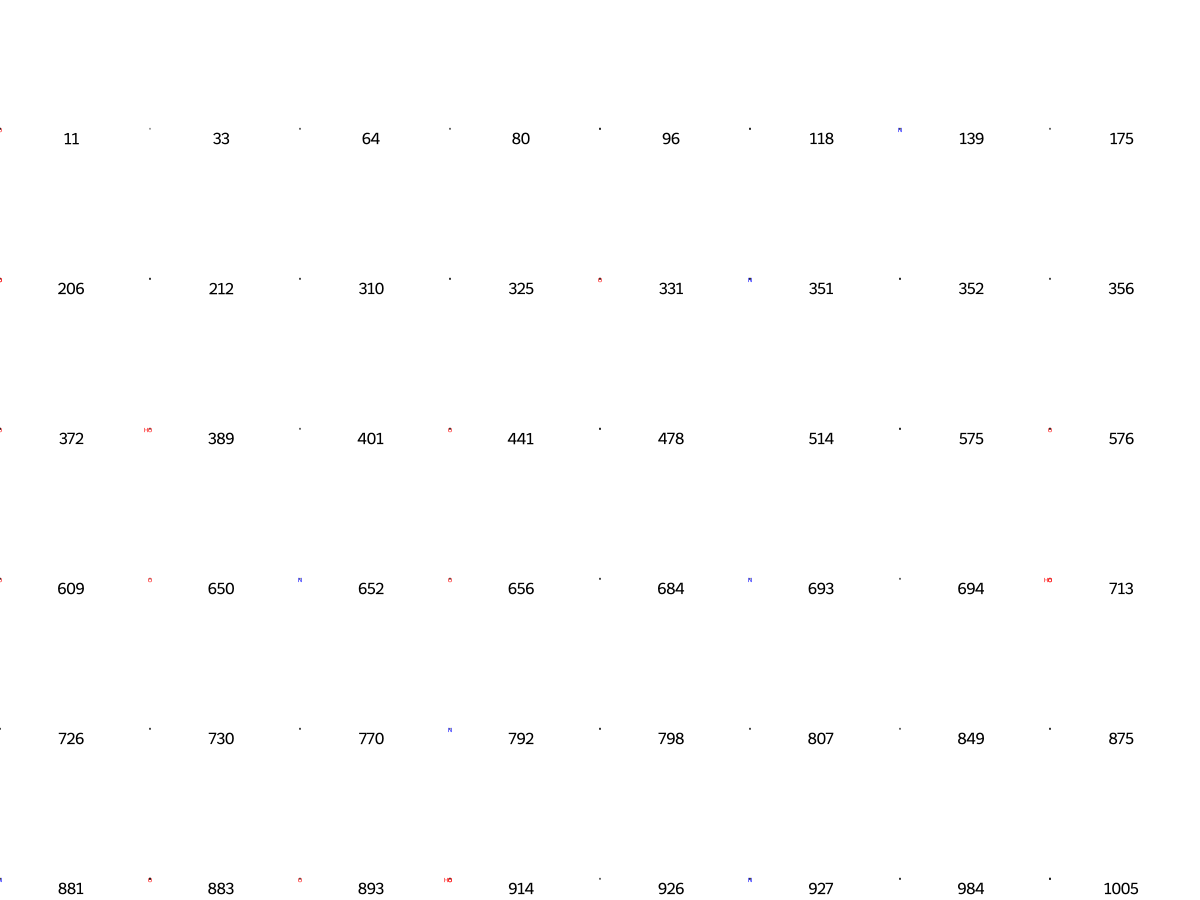

In [2859]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2860]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[25,
 33,
 64,
 75,
 77,
 80,
 121,
 139,
 175,
 189,
 211,
 285,
 314,
 327,
 350,
 351,
 356,
 366,
 389,
 407,
 430,
 452,
 472,
 489,
 504,
 599,
 650,
 681,
 698,
 715,
 726,
 742,
 790,
 801,
 805,
 849,
 881,
 935,
 993,
 1012]

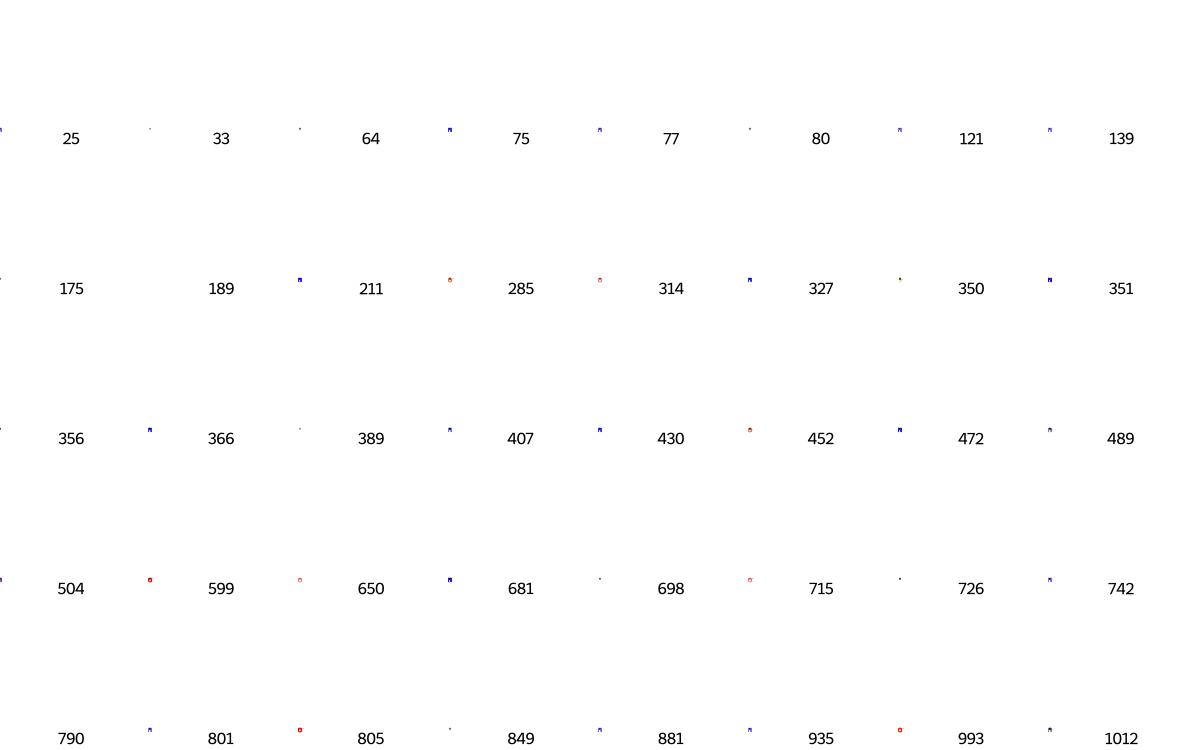

In [2861]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2862]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[4,
 17,
 73,
 80,
 90,
 93,
 224,
 233,
 288,
 301,
 304,
 305,
 314,
 333,
 338,
 351,
 356,
 366,
 378,
 408,
 423,
 428,
 431,
 449,
 483,
 504,
 561,
 575,
 607,
 630,
 650,
 659,
 661,
 673,
 728,
 741,
 742,
 767,
 807,
 833,
 842,
 849,
 875,
 888,
 893,
 926,
 932,
 935,
 1000,
 1002,
 1004,
 1015,
 1019]

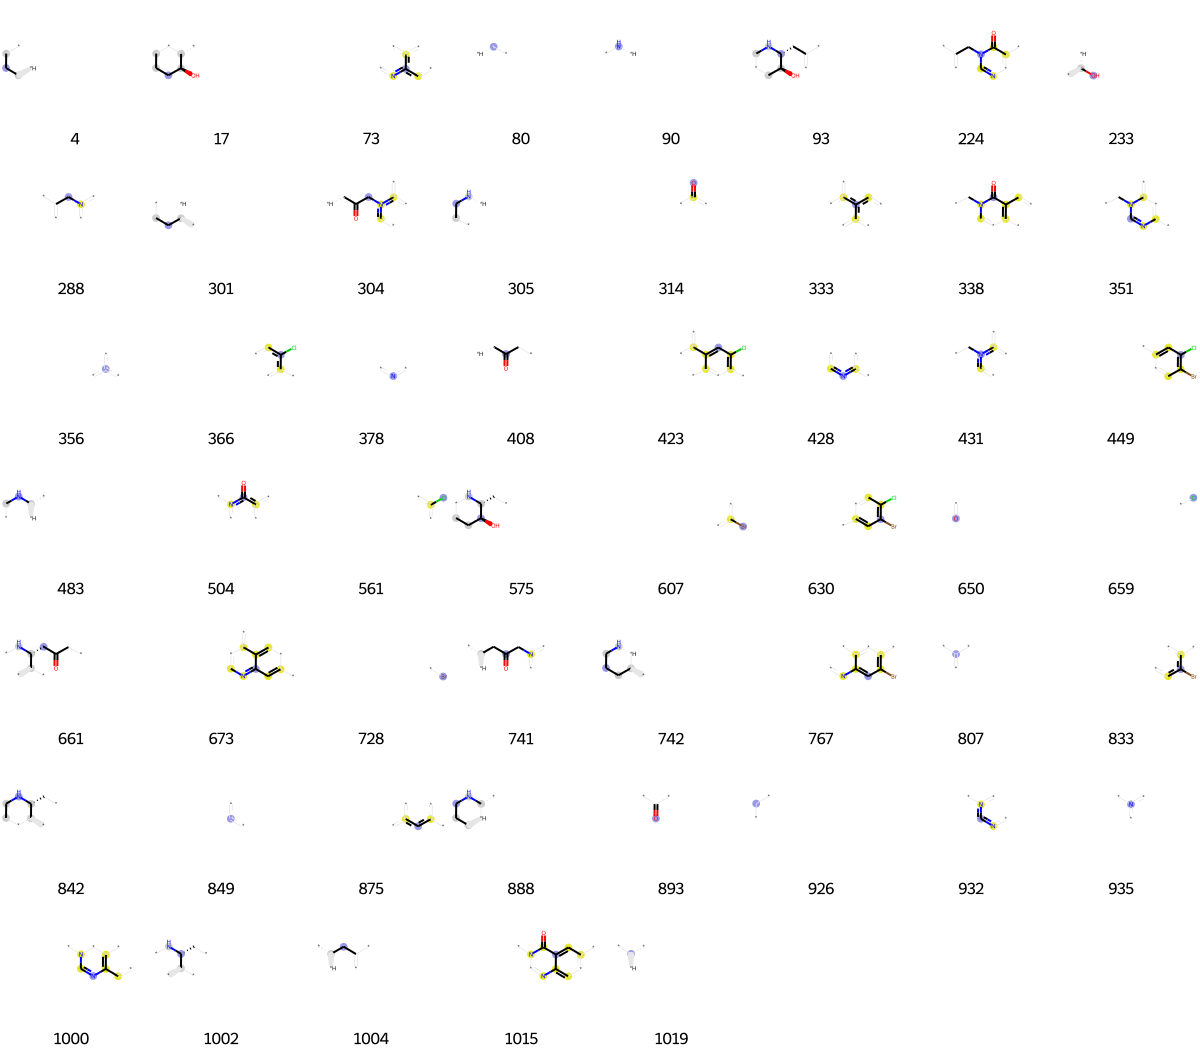

In [2863]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2864]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[29,
 64,
 80,
 128,
 175,
 255,
 295,
 301,
 325,
 356,
 366,
 514,
 561,
 573,
 580,
 647,
 652,
 659,
 695,
 726,
 807,
 849,
 862,
 926,
 966,
 974,
 1004,
 1019]

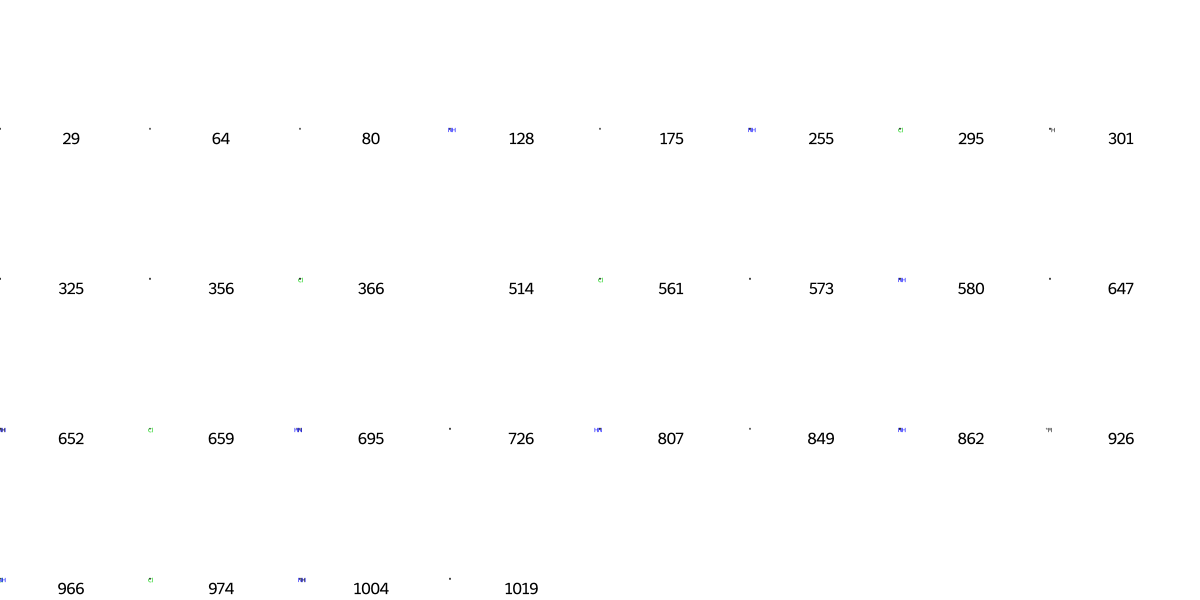

In [2865]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])